In [1]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pickle
import yaml
import pandas as pd
import os
import getdist
from getdist import plots, MCSamples
import sacc
import pacc
import random
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 22
plt.rcParams.update({'font.size': 22})
plt.rc('legend',fontsize=18)
print('matplotlib: {}'.format(matplotlib.__version__))

matplotlib: 3.10.0


## Load Data

In [2]:
s_3x2 = sacc.Sacc.load_fits("/home/jaimerzp/Documents/UCL/3x2_analytical/data/CosmoDC2/summary_statistics_fourier_tjpcov.sacc")
y_3x2 = yaml.load(open("/home/jaimerzp/Documents/UCL/3x2_analytical/data/CosmoDC2/gcgc_gcwl_wlwl.yml"), Loader=yaml.FullLoader)

Assuming data rows are in the correct order as it was before version 1.0.


In [3]:
cle_3x2  = pacc.ClsEnsemble(s_3x2, y_3x2,   label="CosmoDC2 3x2  - data")

In [4]:
data = np.load("/home/jaimerzp/Documents/UCL/3x2_analytical/bpz_fake_chains/nomarg/CosmoDC2_3x2_nomarg_TAP_0.65_init_ϵ_0.03/data_1.npz")
cle_3x2_fake = pacc.ClTheoryEnsemble(cle_3x2, data["data"], label="CosmoDC2 3x2 - Synthetic data")

In [5]:
tpts = np.load("covs/COSMODC2/bpz_3x2_tpts_covs.npz")
cov = np.diag(tpts["cov"])
tt_dz   = np.diag(tpts["TT_dz"])   - cov
tt_wzdz = np.diag(tpts["TT_wzdz"]) - cov
tt_pca  = np.diag(tpts["TT_pca"])  - cov
tt_gp   = np.diag(tpts["TT_gp"])   - cov
total_l = 0
_tt_dz = []
_tt_wzdz = []
_tt_pca = []
_tt_gp = []
_cov = []
for d in cle_3x2.data:
    dz = tt_dz[total_l:total_l+len(d)]
    wzdz = tt_wzdz[total_l:total_l+len(d)]
    pca = tt_pca[total_l:total_l+len(d)]
    gp = tt_gp[total_l:total_l+len(d)]
    c = cov[total_l:total_l+len(d)]
    _tt_dz.append(dz/c)
    _tt_wzdz.append(wzdz/c)
    _tt_pca.append(pca/c)
    _tt_gp.append(gp/c)
    _cov.append(c)
    total_l += len(d)

cle_3x2_tt_dz = pacc.ClsEnsemble(s_3x2, y_3x2,   label=r"$\delta z$")
cle_3x2_tt_dz.errs = _tt_dz
cle_3x2_tt_wzdz = pacc.ClsEnsemble(s_3x2, y_3x2,   label=r"$w_z \, \delta z$")
cle_3x2_tt_wzdz.errs = _tt_wzdz
cle_3x2_tt_pca = pacc.ClsEnsemble(s_3x2, y_3x2,   label="PCA")
cle_3x2_tt_pca.errs = _tt_pca
cle_3x2_tt_gp = pacc.ClsEnsemble(s_3x2, y_3x2,   label="GP")
cle_3x2_tt_gp.errs = _tt_gp

In [6]:
labels = [
    r'$\left(\frac{\partial t^{\rm lens \, 1} \partial t^{\rm lens \, 1}}{\partial_\theta^2}\right)/ \mathbb{C}$',
    r'$\left(\frac{\partial t^{\rm lens \, 2} \partial t^{\rm lens \, 2}}{\partial_\theta^2}\right)/ \mathbb{C}$',
    r'$\left(\frac{\partial t^{\rm lens \, 3} \partial t^{\rm lens \, 3}}{\partial_\theta^2}\right)/ \mathbb{C}$',
    r'$\left(\frac{\partial t^{\rm lens \, 4} \partial t^{\rm lens \, 4}}{\partial_\theta^2}\right)/ \mathbb{C}$',
    r'$\left(\frac{\partial t^{\rm lens \, 5} \partial t^{\rm lens \, 5}}{\partial_\theta^2}\right)/ \mathbb{C}$',
    r'$\left(\frac{\partial t^{\rm source \, 1} \partial t^{\rm source \, 1}}{\partial_\theta^2}\right)/ \mathbb{C}$',
    r'$\left(\frac{\partial t^{\rm source \, 2} \partial t^{\rm source \, 2}}{\partial_\theta^2}\right)/ \mathbb{C}$',
    r'$\left(\frac{\partial t^{\rm source \, 3} \partial t^{\rm source \, 3}}{\partial_\theta^2}\right)/ \mathbb{C}$',
    r'$\left(\frac{\partial t^{\rm source \, 4} \partial t^{\rm source \, 4}}{\partial_\theta^2}\right)/ \mathbb{C}$',
    r'$\left(\frac{\partial t^{\rm source \, 5} \partial t^{\rm source \, 5}}{\partial_\theta^2}\right)/ \mathbb{C}$',
]

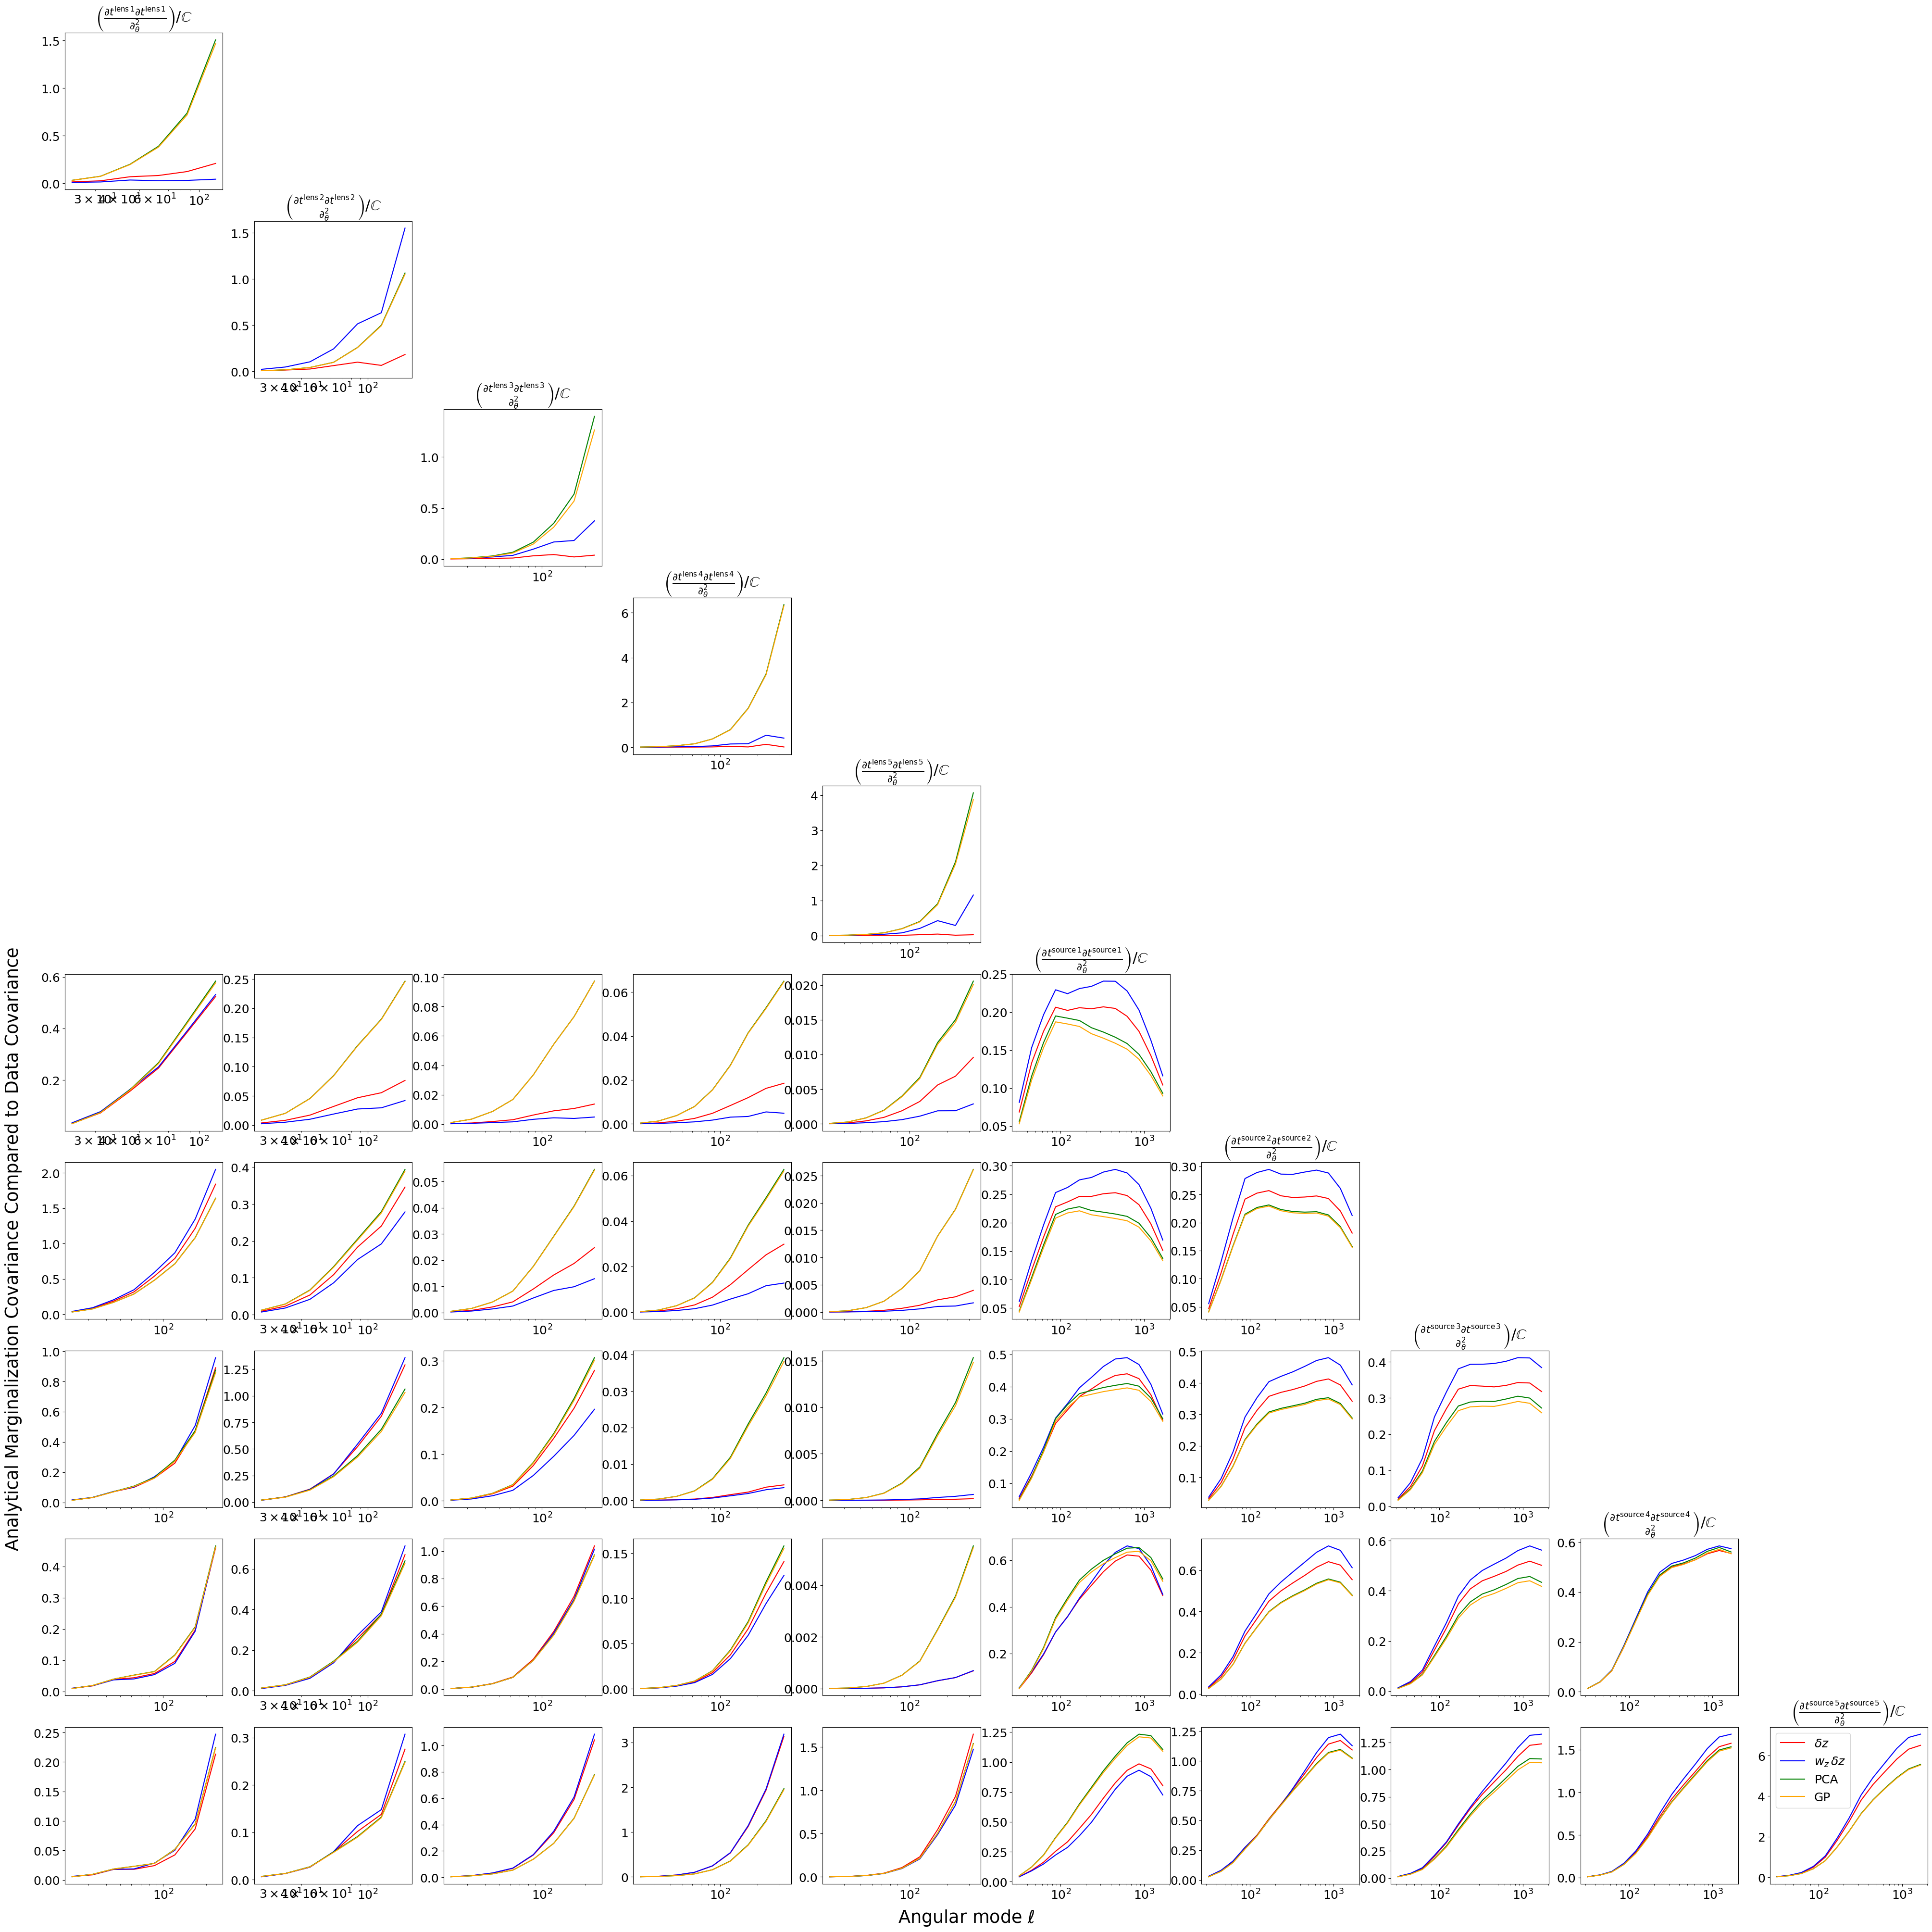

In [7]:
colors = ['r', 'b', 'g', 'orange']
g = pacc.plot_errs([[cle_3x2_tt_dz, cle_3x2_tt_wzdz, cle_3x2_tt_pca, cle_3x2_tt_gp]], cle_3x2.pairs,
               configs=[{'colors': colors},
                        {'colors': colors}, 
                        {'colors': colors}, 
                        {'colors': colors}],
                labels=labels);
g.savefig("./paper_plots/tpts_3x2.pdf", bbox_inches='tight')

In [8]:
labels = [
    r'$C_\ell^{\rm lens 1 \, lens 1}$',
    r'$C_\ell^{\rm lens 2 \, lens 2}$',
    r'$C_\ell^{\rm lens 3 \, lens 3}$',
    r'$C_\ell^{\rm lens 4 \, lens 4}$',
    r'$C_\ell^{\rm lens 5 \, lens 5}$',
    r'$C_\ell^{\rm source 1 \, source 1}$',
    r'$C_\ell^{\rm source 2 \, source 2}$',
    r'$C_\ell^{\rm source 3 \, source 3}$',
    r'$C_\ell^{\rm source 4 \, source 4}$',
    r'$C_\ell^{\rm source 5 \, source 5}$',
]

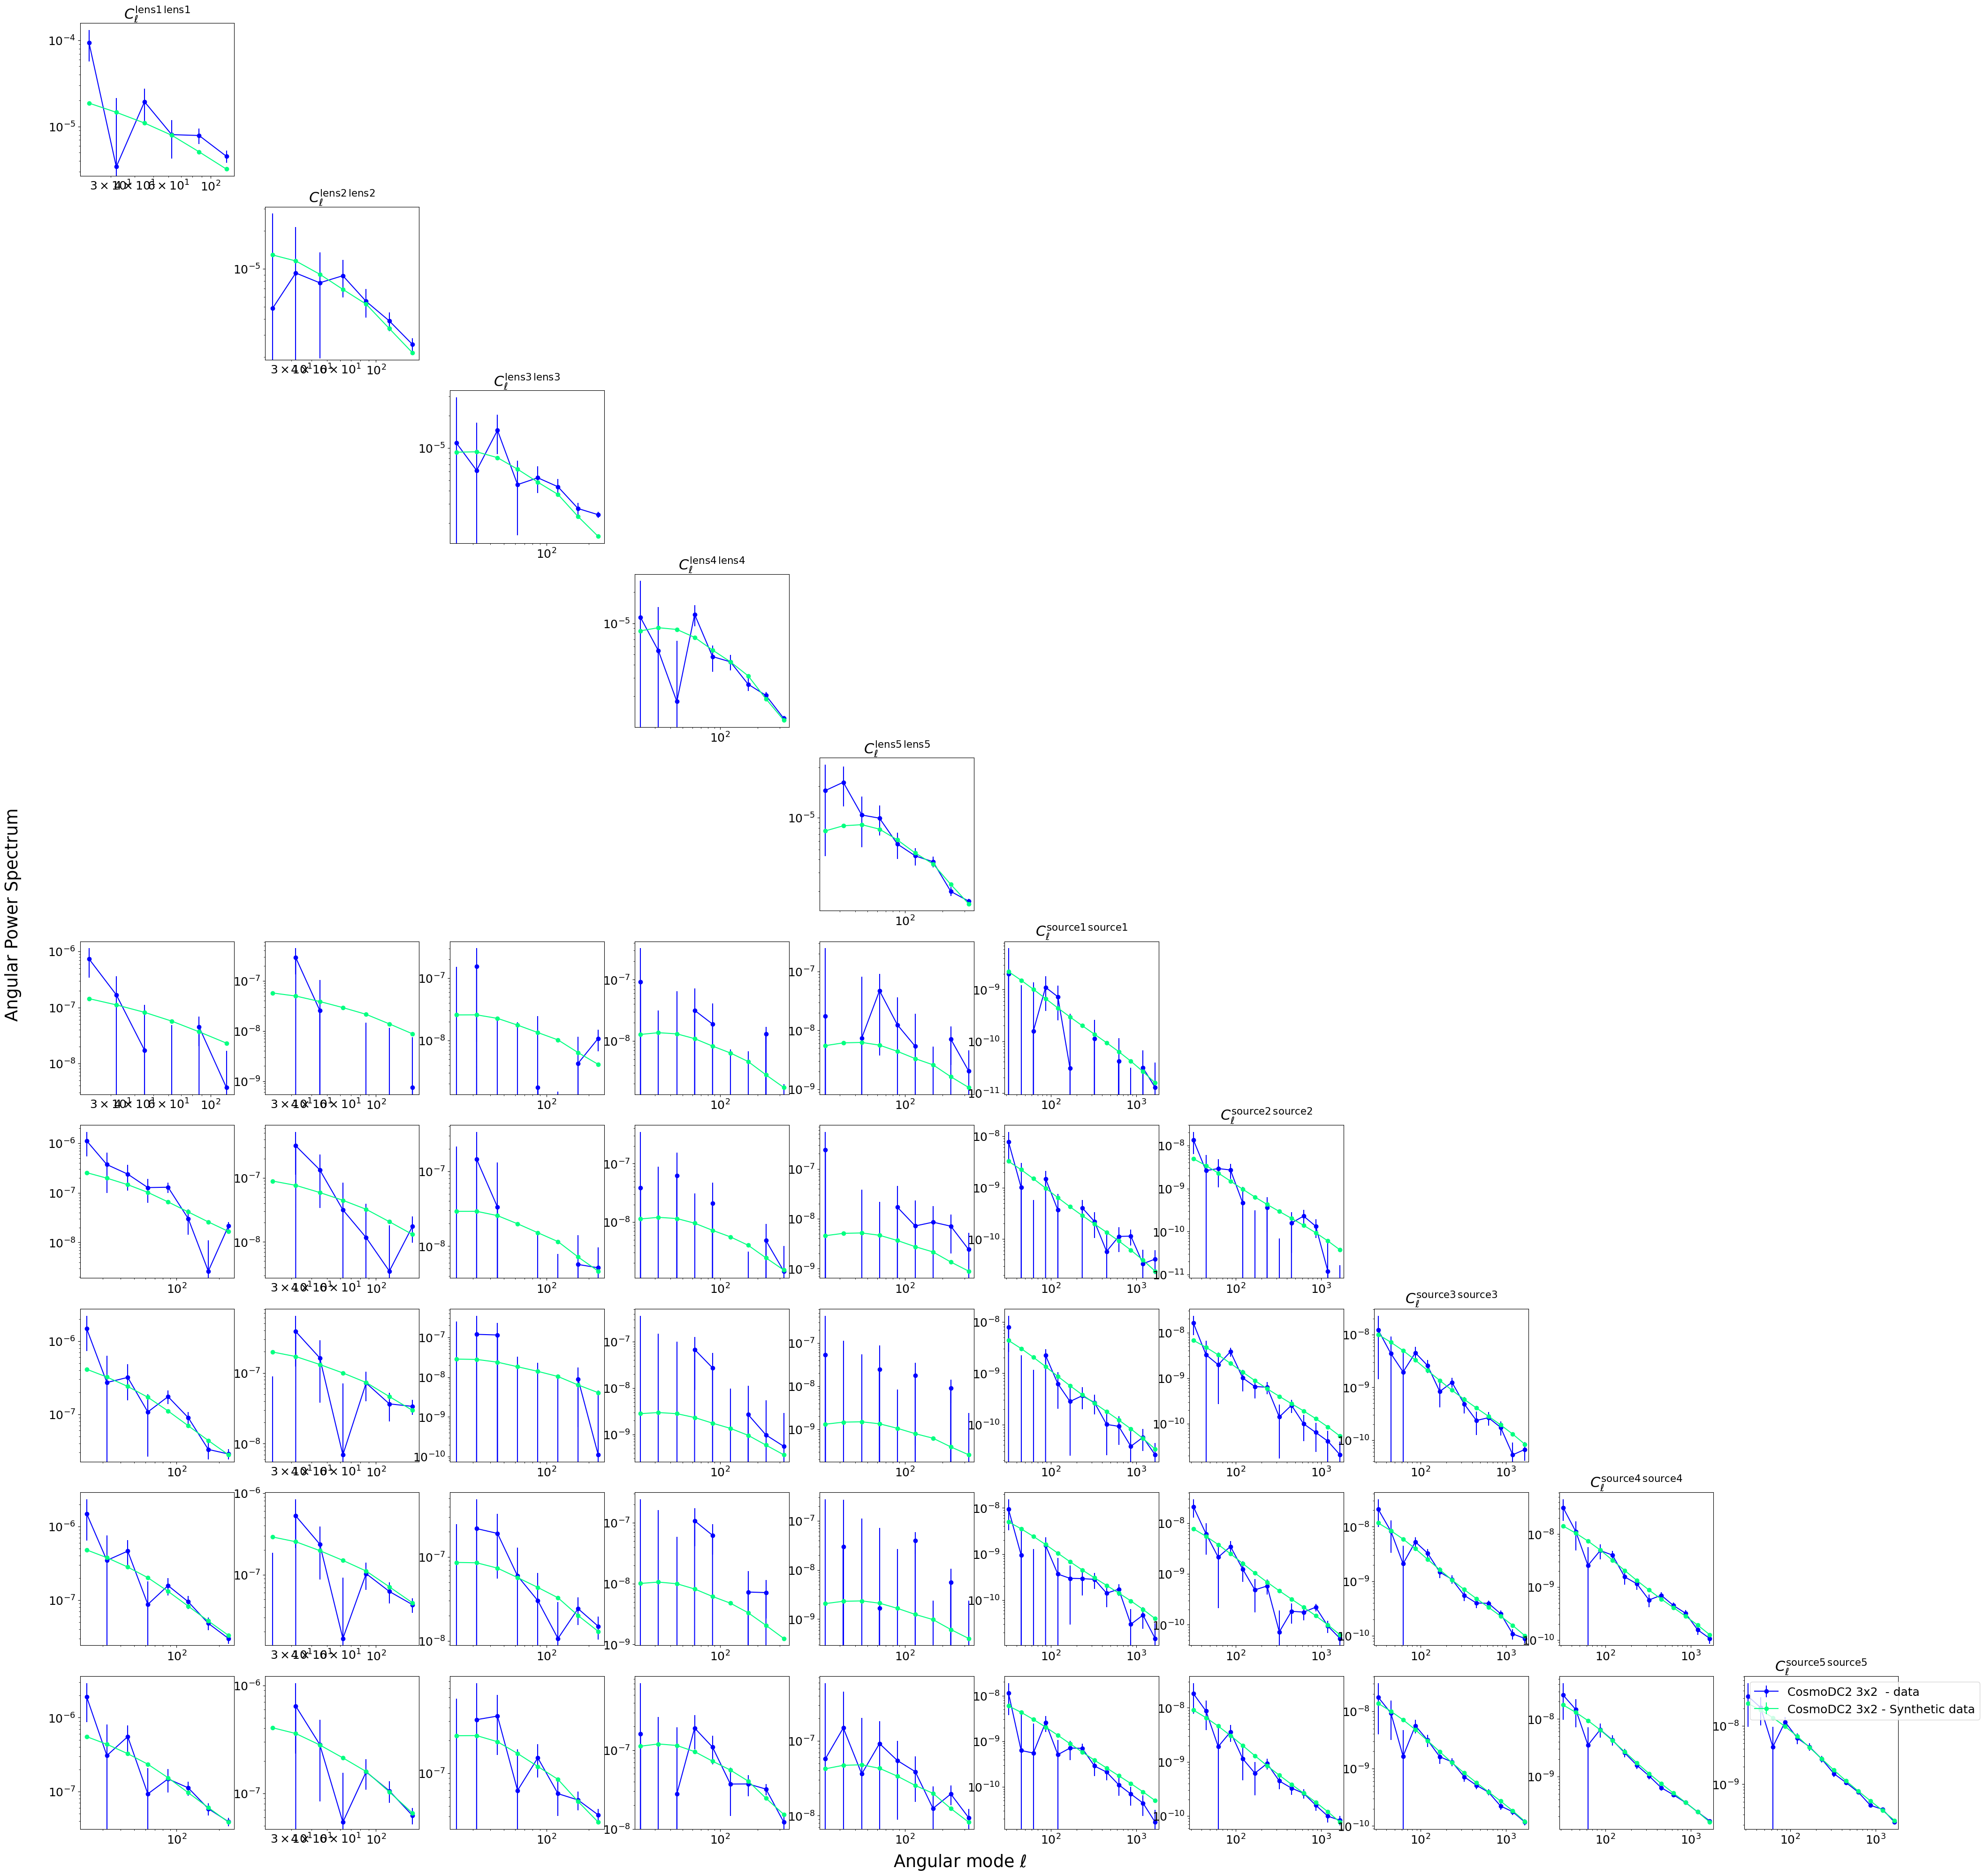

In [9]:
g = pacc.plot_cls([[cle_3x2, cle_3x2_fake]], cle_3x2.pairs, labels=labels);
g.savefig("./paper_plots/data_3x2.pdf", bbox_inches='tight')

In [10]:
from numpy.random import multivariate_normal as mvn
wzdz_path = "./data/CosmoDC2/nzs_lognormal/wzdz_priors/"
nz_lens_0 = np.load(wzdz_path + "wzdz_lens_0.npz")
nz_lens_1 = np.load(wzdz_path + "wzdz_lens_1.npz")
nz_lens_2 = np.load(wzdz_path + "wzdz_lens_2.npz")
nz_lens_3 = np.load(wzdz_path + "wzdz_lens_3.npz")
nz_lens_4 = np.load(wzdz_path + "wzdz_lens_4.npz")
nz_source_0 = np.load(wzdz_path + "wzdz_source_0.npz")
nz_source_1 = np.load(wzdz_path + "wzdz_source_1.npz")
nz_source_2 = np.load(wzdz_path + "wzdz_source_2.npz")
nz_source_3 = np.load(wzdz_path + "wzdz_source_3.npz")
nz_source_4 = np.load(wzdz_path + "wzdz_source_4.npz")

thetas_lens_0 = np.array([np.array([0, 1]) + mvn(np.zeros(2), nz_lens_0["cov"]) for _ in range(5_000)]).T
thetas_lens_1 = np.array([np.array([0, 1]) + mvn(np.zeros(2), nz_lens_1["cov"]) for _ in range(5_000)]).T
thetas_lens_2 = np.array([np.array([0, 1]) + mvn(np.zeros(2), nz_lens_2["cov"]) for _ in range(5_000)]).T
thetas_lens_3 = np.array([np.array([0, 1]) + mvn(np.zeros(2), nz_lens_3["cov"]) for _ in range(5_000)]).T
thetas_lens_4 = np.array([np.array([0, 1]) + mvn(np.zeros(2), nz_lens_4["cov"]) for _ in range(5_000)]).T
thetas_source_0 = np.array([np.array([0, 1]) + mvn(np.zeros(2), nz_source_0["cov"]) for _ in range(5_000)]).T
thetas_source_1 = np.array([np.array([0, 1]) + mvn(np.zeros(2), nz_source_1["cov"]) for _ in range(5_000)]).T
thetas_source_2 = np.array([np.array([0, 1]) + mvn(np.zeros(2), nz_source_2["cov"]) for _ in range(5_000)]).T
thetas_source_3 = np.array([np.array([0, 1]) + mvn(np.zeros(2), nz_source_3["cov"]) for _ in range(5_000)]).T
thetas_source_4 = np.array([np.array([0, 1]) + mvn(np.zeros(2), nz_source_4["cov"]) for _ in range(5_000)]).T

prior_wzdz_chain = {}
prior_wzdz_chain["dz_lens_0"] = thetas_lens_0[0]
prior_wzdz_chain["wz_lens_0"] = thetas_lens_0[1]
prior_wzdz_chain["dz_lens_1"] = thetas_lens_1[0]
prior_wzdz_chain["wz_lens_1"] = thetas_lens_1[1]
prior_wzdz_chain["dz_lens_2"] = thetas_lens_2[0]
prior_wzdz_chain["wz_lens_2"] = thetas_lens_2[1]
prior_wzdz_chain["dz_lens_3"] = thetas_lens_3[0]
prior_wzdz_chain["wz_lens_3"] = thetas_lens_3[1]
prior_wzdz_chain["dz_lens_4"] = thetas_lens_4[0]
prior_wzdz_chain["wz_lens_4"] = thetas_lens_4[1]
prior_wzdz_chain["dz_source_0"] = thetas_source_0[0]
prior_wzdz_chain["wz_source_0"] = thetas_source_0[1]
prior_wzdz_chain["dz_source_1"] = thetas_source_1[0]
prior_wzdz_chain["wz_source_1"] = thetas_source_1[1]
prior_wzdz_chain["dz_source_2"] = thetas_source_2[0]
prior_wzdz_chain["wz_source_2"] = thetas_source_2[1]
prior_wzdz_chain["dz_source_3"] = thetas_source_3[0]
prior_wzdz_chain["wz_source_3"] = thetas_source_3[1]
prior_wzdz_chain["dz_source_4"] = thetas_source_4[0]
prior_wzdz_chain["wz_source_4"] = thetas_source_4[1]

## Load Chains

In [11]:
def add_chains(paths, start=1, stop=100):
    chains = []
    for path in paths:
        i = start
        while (os.path.isfile(path+"chain_{}.csv".format(i))) & (i<=stop):
            chain = pd.read_csv(path+"chain_{}.csv".format(i))
            chain = pd.DataFrame(np.array(chain)[50:, :], columns=chain.columns)
            chains.append(chain)
            i += 1
    chain = pd.concat(chains)
    return chain

In [12]:
def add_summaries(paths, start=1, stop=100):
    ess_per_secs = []
    mcses = []
    for path in paths:
        i = start
        while (os.path.isfile(path+"summary_{}.csv".format(i))) & (i<=stop):
            ess_per_sec = pd.read_csv(path+"summary_{}.csv".format(i))["ess_per_sec"]
            mcse = pd.read_csv(path+"summary_{}.csv".format(i))["mcse"]
            std = pd.read_csv(path+"summary_{}.csv".format(i))["std"]
            ess_per_secs.append(np.array(ess_per_sec[2:8]))
            mcses.append(np.array(mcse[2:8])/np.array(std[2:8]))
            i += 1
    return [np.mean(ess_per_secs), np.mean(mcse)]

In [13]:
method = "lognormal"

path_3x2_nuisance_nomarg = f"{method}_fake_chains/nomarg/CosmoDC2_3x2_nomarg_TAP_0.65_init_ϵ_0.03/"
path_3x2_nuisance_nomarg_old = "nuisance_fake_chains/nomarg/CosmoDC2_3x2_nomarg_TAP_0.65_init_ϵ_0.03/"

path_3x2_nuisance_dz_ana = f"{method}_fake_chains/analytical/CosmoDC2_3x2_dz_ana_TAP_0.65_init_ϵ_0.03/"
path_3x2_nuisance_wzdz_ana= f"{method}_fake_chains/analytical/CosmoDC2_3x2_wzdz_ana_TAP_0.65_init_ϵ_0.03/"
path_3x2_nuisance_PCA_ana = f"{method}_fake_chains/analytical/CosmoDC2_3x2_PCA_ana_TAP_0.65_init_ϵ_0.03/"
path_3x2_nuisance_gp_ana = f"{method}_fake_chains/analytical/CosmoDC2_3x2_gp_ana_TAP_0.65_init_ϵ_0.03/"

path_3x2_nuisance_dz_mum = f"{method}_fake_chains/numerical/CosmoDC2_3x2_Gibbs_dz_num_TAP_0.65_init_ϵ1_0.01_init_ϵ2_0.05/"
path_3x2_nuisance_wzdz_num = f"{method}_fake_chains/numerical/CosmoDC2_3x2_Gibbs_wzdz_num_TAP_0.65_init_ϵ1_0.01_init_ϵ2_0.03/"
path_3x2_nuisance_PCA_num = f"{method}_fake_chains/numerical/CosmoDC2_3x2_Gibbs_PCA_num_TAP_0.65_init_ϵ1_0.01_init_ϵ2_0.05/"
path_3x2_nuisance_gp_num = f"{method}_fake_chains/numerical/CosmoDC2_3x2_Gibbs_gp_num_TAP_0.65_init_ϵ1_0.01_init_ϵ2_0.05/"

In [14]:
chain_3x2_nuisance_nomarg = add_chains([path_3x2_nuisance_nomarg])
#chain_3x2_nuisance_nomarg_old = add_chains([path_3x2_nuisance_nomarg_old])
chain_3x2_nuisance_dz_ana = add_chains([path_3x2_nuisance_dz_ana])
chain_3x2_nuisance_wzdz_ana = add_chains([path_3x2_nuisance_wzdz_ana])
chain_3x2_nuisance_PCA_ana = add_chains([path_3x2_nuisance_PCA_ana])
chain_3x2_nuisance_gp_ana = add_chains([path_3x2_nuisance_gp_ana])
chain_3x2_nuisance_dz_num = add_chains([path_3x2_nuisance_dz_mum])
chain_3x2_nuisance_wzdz_num = add_chains([path_3x2_nuisance_wzdz_num])
chain_3x2_nuisance_PCA_num = add_chains([path_3x2_nuisance_PCA_num])
chain_3x2_nuisance_gp_num = add_chains([path_3x2_nuisance_gp_num])

In [15]:
summary_3x2_nuisance_nomarg = add_summaries([path_3x2_nuisance_nomarg])
#summary_3x2_nuisance_nomarg_old = add_summaries([path_3x2_nuisance_nomarg_old])
summary_3x2_nuisance_dz_ana = add_summaries([path_3x2_nuisance_dz_ana])
summary_3x2_nuisance_wzdz_ana = add_summaries([path_3x2_nuisance_wzdz_ana])
summary_3x2_nuisance_PCA_ana = add_summaries([path_3x2_nuisance_PCA_ana])
summary_3x2_nuisance_gp_ana = add_summaries([path_3x2_nuisance_gp_ana])
summary_3x2_nuisance_dz_num = add_summaries([path_3x2_nuisance_dz_mum])
summary_3x2_nuisance_wzdz_num = add_summaries([path_3x2_nuisance_wzdz_num])
summary_3x2_nuisance_PCA_num = add_summaries([path_3x2_nuisance_PCA_num])
summary_3x2_nuisance_gp_num = add_summaries([path_3x2_nuisance_gp_num])

In [16]:
print("dz ana MCSE: ", summary_3x2_nuisance_dz_ana[1])
print("wzdz ana MCSE: ", summary_3x2_nuisance_wzdz_ana[1])
print("PCA ana MCSE: ", summary_3x2_nuisance_PCA_ana[1])
print("gp ana MCSE: ", summary_3x2_nuisance_gp_ana[1])
print("dz num MCSE: ", summary_3x2_nuisance_dz_num[1])
print("wzdz num MCSE: ", summary_3x2_nuisance_wzdz_num[1])
print("PCA num MCSE: ", summary_3x2_nuisance_PCA_num[1])
print("gp num MCSE: ", summary_3x2_nuisance_gp_num[1])

dz ana MCSE:  0.0007797783217924628
wzdz ana MCSE:  0.000836397454879033
PCA ana MCSE:  0.0007513872810306221
gp ana MCSE:  0.0008785502425544725
dz num MCSE:  0.02529073298184809
wzdz num MCSE:  0.05054608395583158
PCA num MCSE:  0.015268406350284223
gp num MCSE:  0.10448793869876087


In [17]:
print("dz ESS: ", summary_3x2_nuisance_dz_ana[0]/summary_3x2_nuisance_dz_num[0])
print("wz ESS: ", summary_3x2_nuisance_wzdz_ana[0]/summary_3x2_nuisance_wzdz_num[0])
print("PCA ESS: ", summary_3x2_nuisance_PCA_ana[0]/summary_3x2_nuisance_PCA_num[0])
print("gp ESS: ", summary_3x2_nuisance_gp_ana[0]/summary_3x2_nuisance_gp_num[0])

dz ESS:  4.713663037530679
wz ESS:  11.5727164742342
PCA ESS:  9.301820747306822
gp ESS:  5.807718105723742


## Trace plots

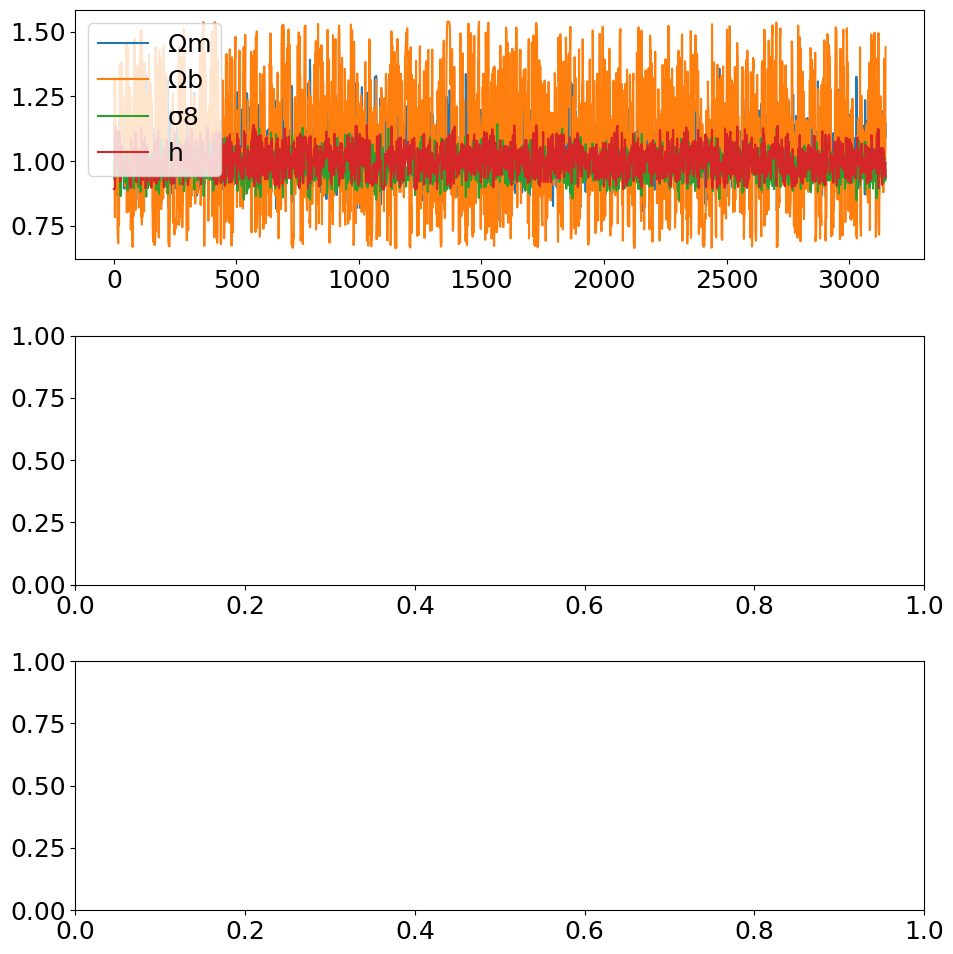

In [18]:
fig, axs = plt.subplots(3, 1, figsize=(10, 10))
chain = chain_3x2_nuisance_nomarg
# First plot
axs[0].plot(np.array(chain["Ωm"])/0.27347, label="Ωm")
axs[0].plot(np.array(chain["Ωb"])/0.04217, label="Ωb")
axs[0].plot(np.array(chain["σ8"])/0.779007, label="σ8")
axs[0].plot(np.array(chain["h"])/0.71899, label="h")
axs[0].legend()
# Second plot
#axs[1].plot(np.array(chain_Y1_gcgc_nomarg["Ωm"])/0.27347, label="Ωm")
#axs[1].plot(np.array(chain_Y1_gcgc_nomarg["Ωb"])/0.04217, label="Ωb")
#axs[1].plot(np.array(chain_Y1_gcgc_nomarg["σ8"])/0.779007, label="σ8")
#axs[1].plot(np.array(chain_Y1_gcgc_nomarg["h"])/0.71899, label="h")
#axs[1].legend()
# Second plot
#axs[2].plot(np.array(chain_Y1_wlwl_nomarg["Ωm"])/0.27347, label="Ωm")
#axs[2].plot(np.array(chain_Y1_wlwl_nomarg["Ωb"])/0.04217, label="Ωb")
#axs[2].plot(np.array(chain_Y1_wlwl_nomarg["σ8"])/0.779007, label="σ8")
#axs[2].plot(np.array(chain_Y1_wlwl_nomarg["h"])/0.71899, label="h")
#axs[2].legend()

plt.tight_layout()
plt.show()

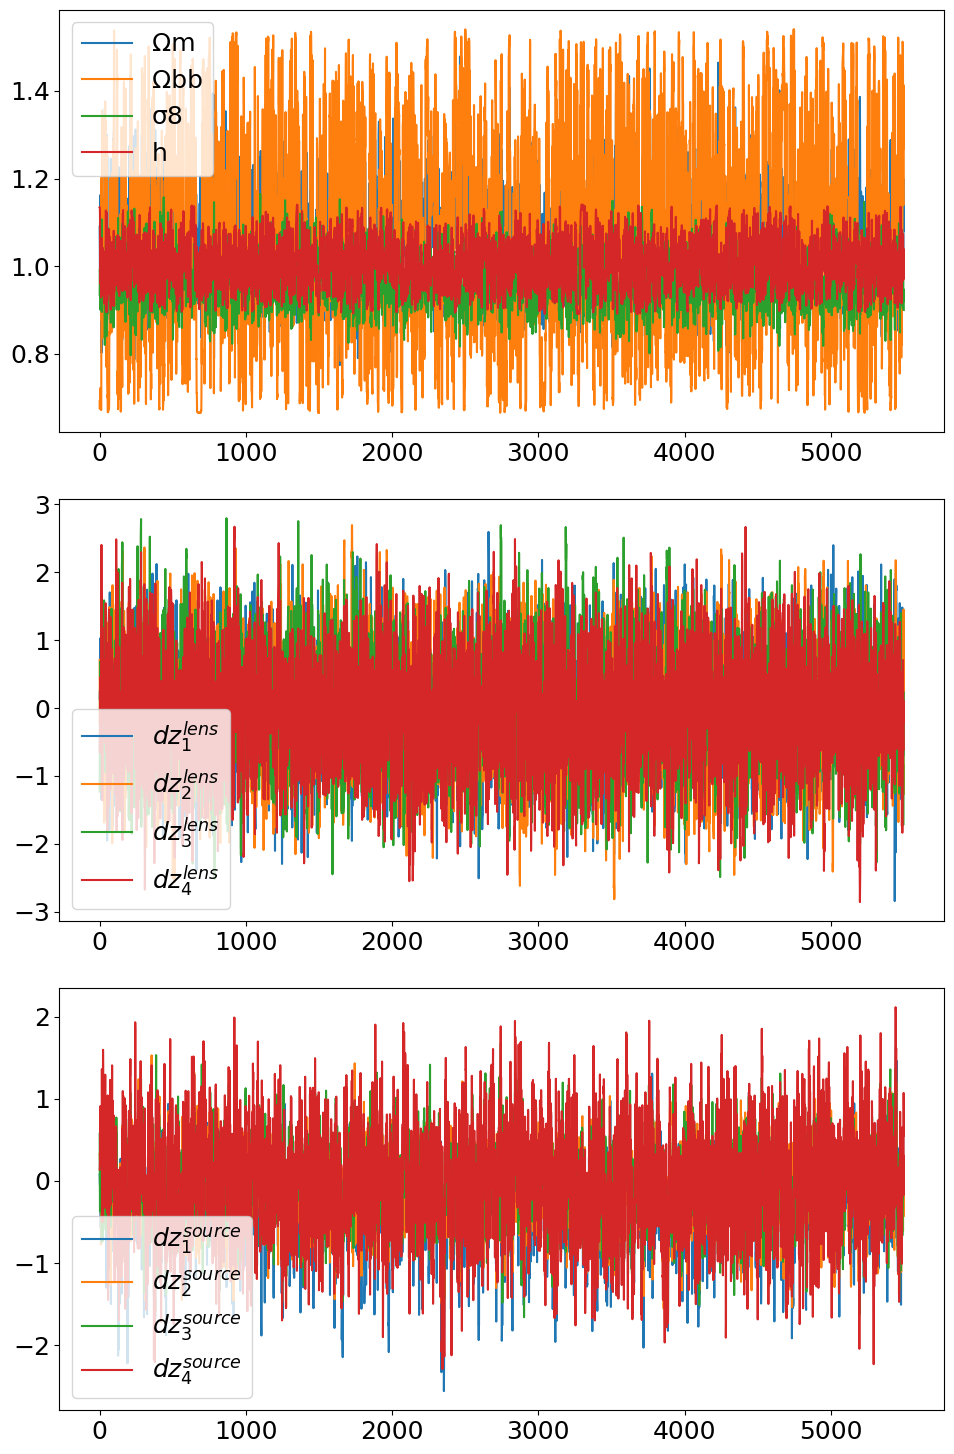

In [19]:
fig, axs = plt.subplots(3, 1, figsize=(10, 15))
chain = chain_3x2_nuisance_dz_num
# First plot
axs[0].plot(np.array(chain["Ωm"])/0.27347, label="Ωm")
axs[0].plot(np.array(chain["Ωbb"])/0.4217, label="Ωbb")
axs[0].plot(np.array(chain["σ8"])/0.779007, label="σ8")
axs[0].plot(np.array(chain["h"])/0.71899, label="h")
axs[0].legend()
# Second plot
axs[1].plot(np.array(chain["alphas_lens_0[1]"]), label=r"$dz^{lens}_1$")
axs[1].plot(np.array(chain["alphas_lens_1[1]"]), label=r"$dz^{lens}_2$")
axs[1].plot(np.array(chain["alphas_lens_2[1]"]), label=r"$dz^{lens}_3$")
axs[1].plot(np.array(chain["alphas_lens_3[1]"]), label=r"$dz^{lens}_4$")
axs[1].legend()
# Third plot
axs[2].plot(np.array(chain["alphas_source_0[1]"]), label=r"$dz^{source}_1$")
axs[2].plot(np.array(chain["alphas_source_1[1]"]), label=r"$dz^{source}_2$")
axs[2].plot(np.array(chain["alphas_source_2[1]"]), label=r"$dz^{source}_3$")
axs[2].plot(np.array(chain["alphas_source_3[1]"]), label=r"$dz^{source}_4$")
axs[2].legend()

plt.tight_layout()
plt.show()

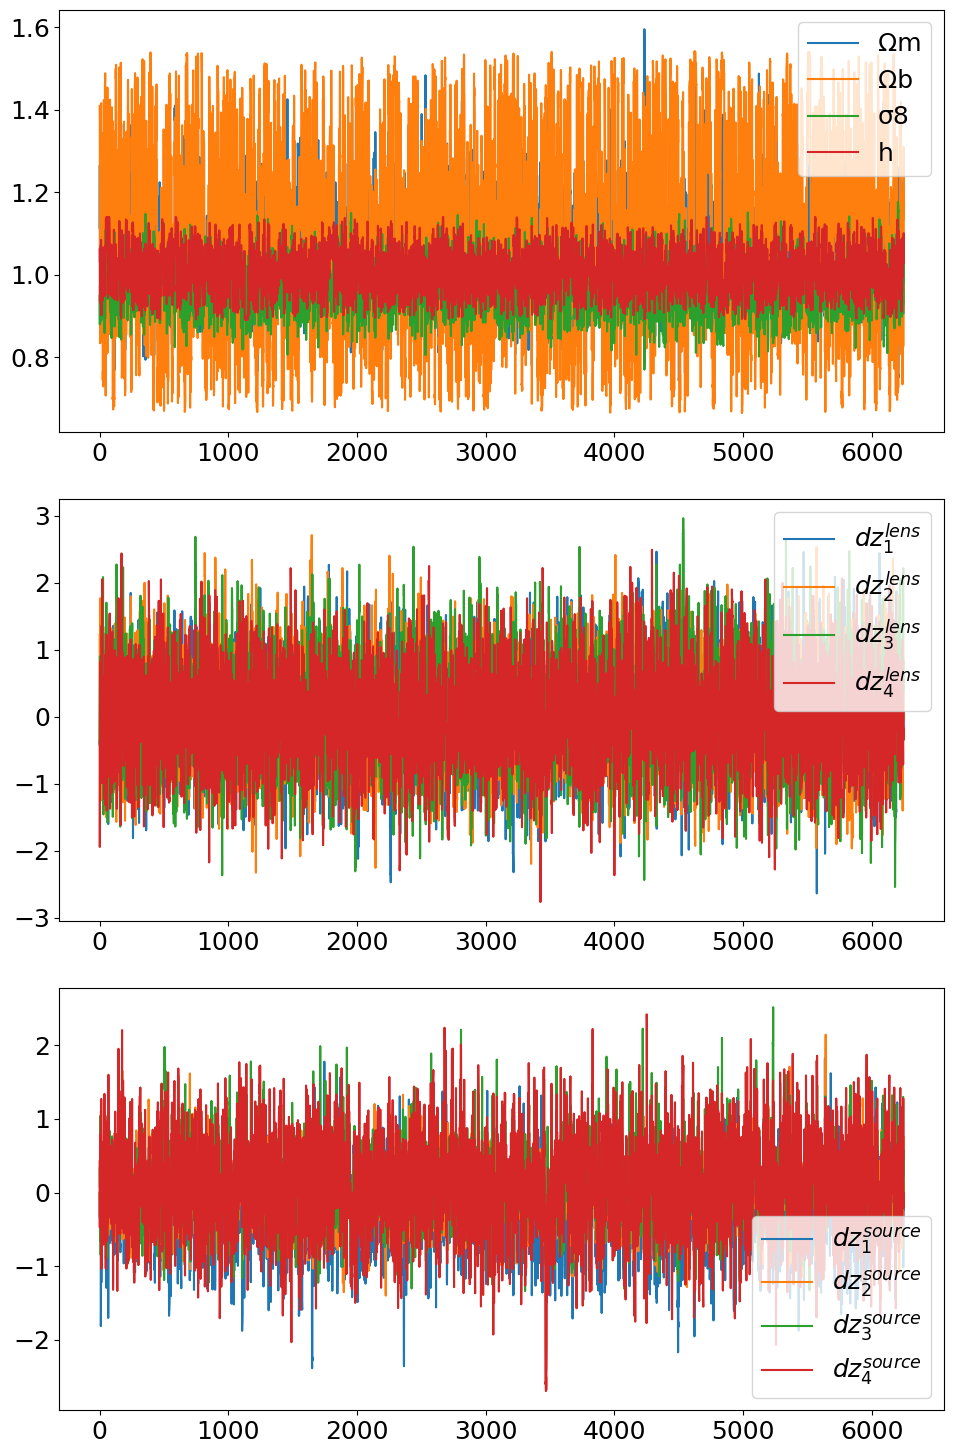

In [20]:
fig, axs = plt.subplots(3, 1, figsize=(10, 15))
chain = chain_3x2_nuisance_wzdz_num
# First plot
axs[0].plot(np.array(chain["Ωm"])/0.27347, label="Ωm")
axs[0].plot(np.array(chain["Ωb"])/0.04217, label="Ωb")
axs[0].plot(np.array(chain["σ8"])/0.779007, label="σ8")
axs[0].plot(np.array(chain["h"])/0.71899, label="h")
axs[0].legend()
# Second plot
axs[1].plot(np.array(chain["alphas_lens_0[1]"]), label=r"$dz^{lens}_1$")
axs[1].plot(np.array(chain["alphas_lens_1[1]"]), label=r"$dz^{lens}_2$")
axs[1].plot(np.array(chain["alphas_lens_2[1]"]), label=r"$dz^{lens}_3$")
axs[1].plot(np.array(chain["alphas_lens_3[1]"]), label=r"$dz^{lens}_4$")
axs[1].legend()
# Third plot
axs[2].plot(np.array(chain["alphas_source_0[1]"]), label=r"$dz^{source}_1$")
axs[2].plot(np.array(chain["alphas_source_1[1]"]), label=r"$dz^{source}_2$")
axs[2].plot(np.array(chain["alphas_source_2[1]"]), label=r"$dz^{source}_3$")
axs[2].plot(np.array(chain["alphas_source_3[1]"]), label=r"$dz^{source}_4$")
axs[2].legend()

plt.tight_layout()
plt.show()

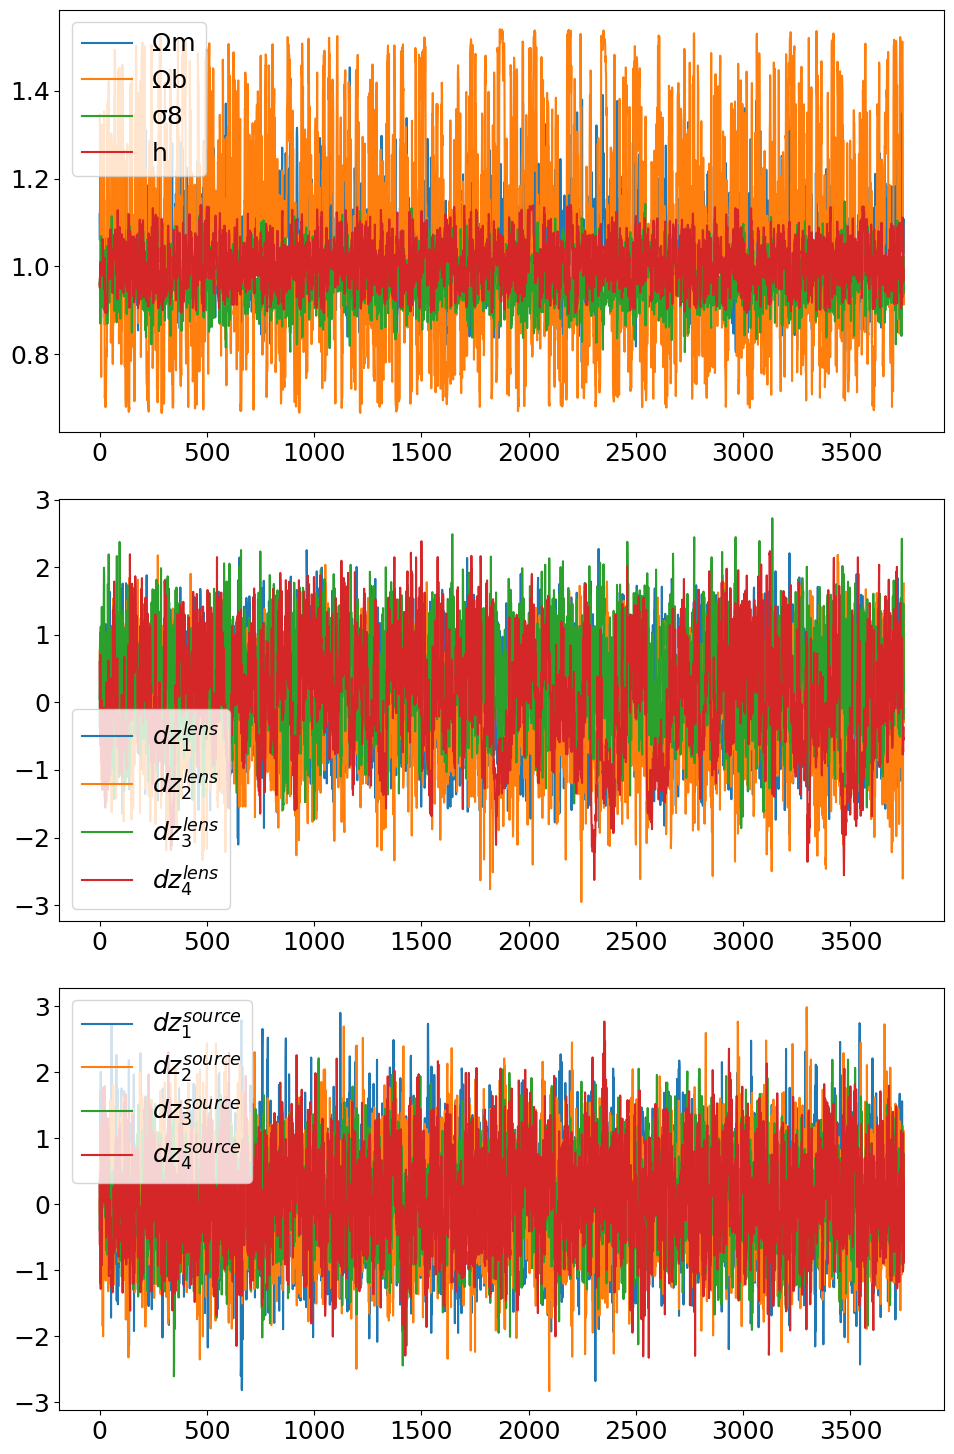

In [21]:
fig, axs = plt.subplots(3, 1, figsize=(10, 15))
chain = chain_3x2_nuisance_PCA_num
# First plot
axs[0].plot(np.array(chain["Ωm"])/0.27347, label="Ωm")
axs[0].plot(np.array(chain["Ωb"])/0.04217, label="Ωb")
axs[0].plot(np.array(chain["σ8"])/0.779007, label="σ8")
axs[0].plot(np.array(chain["h"])/0.71899, label="h")
axs[0].legend()
# Second plot
axs[1].plot(np.array(chain["alphas_lens_0[1]"]), label=r"$dz^{lens}_1$")
axs[1].plot(np.array(chain["alphas_lens_1[1]"]), label=r"$dz^{lens}_2$")
axs[1].plot(np.array(chain["alphas_lens_2[1]"]), label=r"$dz^{lens}_3$")
axs[1].plot(np.array(chain["alphas_lens_3[1]"]), label=r"$dz^{lens}_4$")
axs[1].legend()
# Third plot
axs[2].plot(np.array(chain["alphas_source_0[1]"]), label=r"$dz^{source}_1$")
axs[2].plot(np.array(chain["alphas_source_1[1]"]), label=r"$dz^{source}_2$")
axs[2].plot(np.array(chain["alphas_source_2[1]"]), label=r"$dz^{source}_3$")
axs[2].plot(np.array(chain["alphas_source_3[1]"]), label=r"$dz^{source}_4$")
axs[2].legend()

plt.tight_layout()
plt.show()

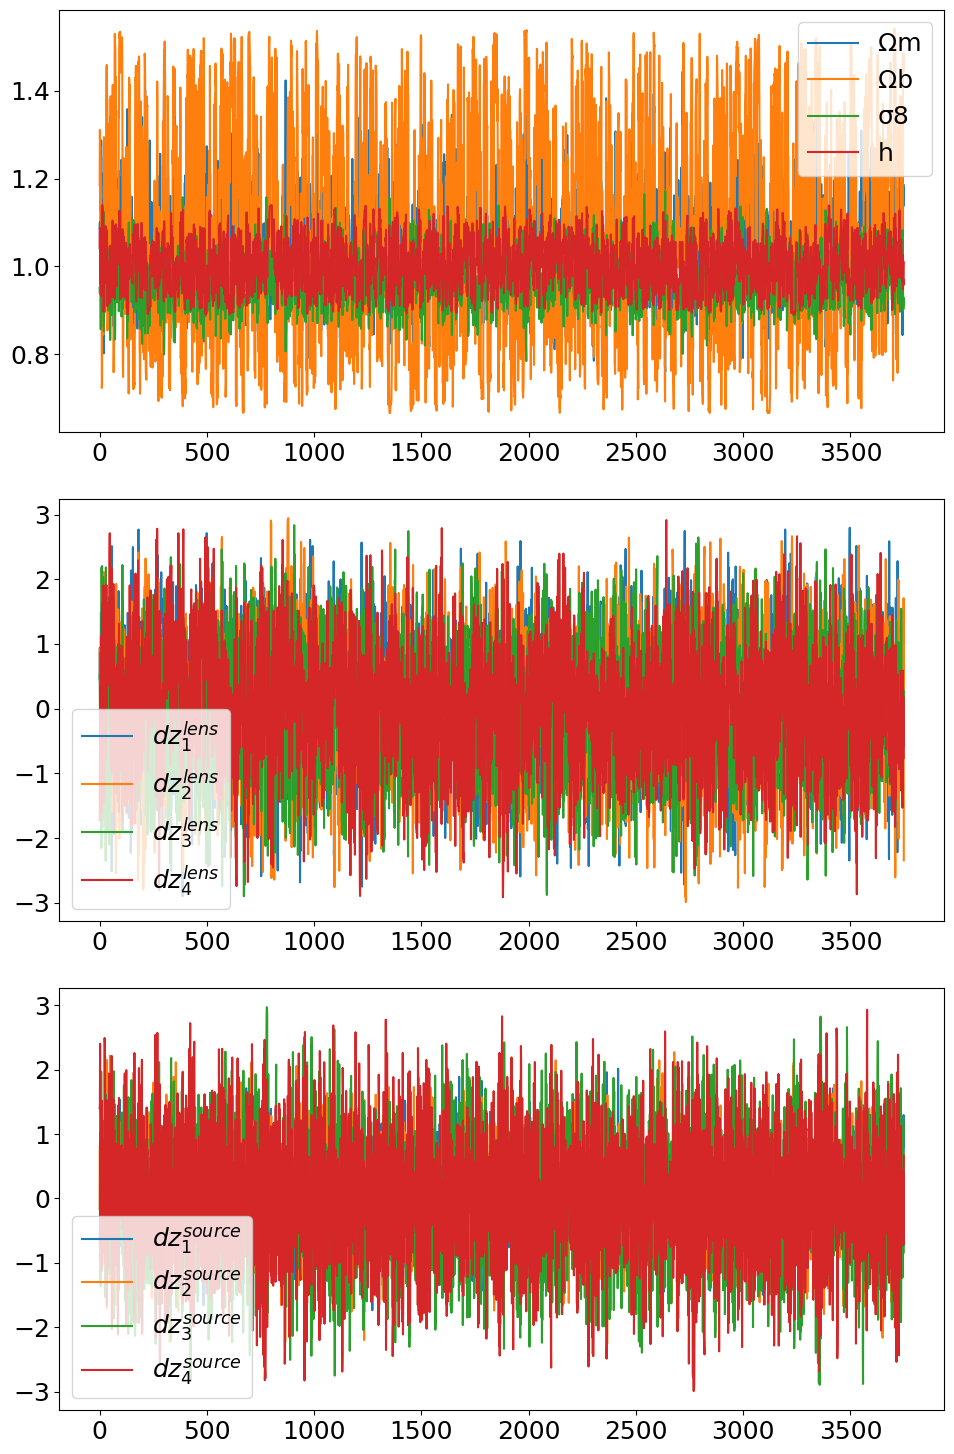

In [22]:
fig, axs = plt.subplots(3, 1, figsize=(10, 15))
chain = chain_3x2_nuisance_gp_num
# First plot
axs[0].plot(np.array(chain["Ωm"])/0.27347, label="Ωm")
axs[0].plot(np.array(chain["Ωb"])/0.04217, label="Ωb")
axs[0].plot(np.array(chain["σ8"])/0.779007, label="σ8")
axs[0].plot(np.array(chain["h"])/0.71899, label="h")
axs[0].legend()
# Second plot
axs[1].plot(np.array(chain["alphas_lens_0[1]"]), label=r"$dz^{lens}_1$")
axs[1].plot(np.array(chain["alphas_lens_1[1]"]), label=r"$dz^{lens}_2$")
axs[1].plot(np.array(chain["alphas_lens_2[1]"]), label=r"$dz^{lens}_3$")
axs[1].plot(np.array(chain["alphas_lens_3[1]"]), label=r"$dz^{lens}_4$")
axs[1].legend()
# Third plot
axs[2].plot(np.array(chain["alphas_source_0[1]"]), label=r"$dz^{source}_1$")
axs[2].plot(np.array(chain["alphas_source_1[1]"]), label=r"$dz^{source}_2$")
axs[2].plot(np.array(chain["alphas_source_2[1]"]), label=r"$dz^{source}_3$")
axs[2].plot(np.array(chain["alphas_source_3[1]"]), label=r"$dz^{source}_4$")
axs[2].legend()

plt.tight_layout()
plt.show()

## Posteriors

In [23]:
labels_dict = {'h': 'h',
               'Ωm': r'\Omega_m',
               'Ωb': r'\Omega_b',
               'ns': 'n_s',
               'σ8': r'\sigma_8',
               'S8': 'S_8',

               'lens_0_b': r'b_{lens}^{0}',
               'lens_1_b': r'b_{lens}^{1}',
               'lens_2_b': r'b_{lens}^{2}',
               'lens_3_b': r'b_{lens}^{3}',
               'lens_4_b': r'b_{lens}^{4}',

               'dz_lens_0': r'\Delta^{0}_{z, lens}',
               'dz_lens_1': r'\Delta^{1}_{z, lens}',
               'dz_lens_2': r'\Delta^{2}_{z, lens}',
               'dz_lens_3': r'\Delta^{3}_{z, lens}',
               'dz_lens_4': r'\Delta^{4}_{z, lens}',
               'dz_source_0': r'\Delta^{0}_{z, source}',
               'dz_source_1': r'\Delta^{1}_{z, source}',
               'dz_source_2': r'\Delta^{2}_{z, source}',
               'dz_source_3': r'\Delta^{3}_{z, source}',
               'dz_source_4': r'\Delta^{4}_{z, source}', 

               'wz_lens_0': r'w^{0}_{z, lens}',
               'wz_lens_1': r'w^{1}_{z, lens}',
               'wz_lens_2': r'w^{2}_{z, lens}',
               'wz_lens_3': r'w^{3}_{z, lens}',
               'wz_lens_4': r'w^{4}_{z, lens}',
               'wz_source_0': r'w^{0}_{z, source}',
               'wz_source_1': r'w^{1}_{z, source}',
               'wz_source_2': r'w^{2}_{z, source}',
               'wz_source_3': r'w^{3}_{z, source}',
               'wz_source_4': r'w^{4}_{z, source}',
               
               'A_IA': 'A_{IA}',
               
               'Xi2': r'\chi^2',}

In [24]:
def make_chain(file, label, ranges=dict({}), weight=False, labels_dict=labels_dict):
    params = np.array(list(file.keys()))
    names = []
    labels = []
    samples = []
    print(label)
    for param in params:
        #print(param)
        if param in labels_dict.keys():
            #print(param)
            names.append(param) 
            labels.append(labels_dict[param]) 
            samples.append(file[param])
    if ('σ8' in params) & ('Ωm' in params):
        #print('S8')
        names.append('S8')
        labels.append(labels_dict['S8'])
        samples.append(file['σ8']*np.sqrt(file['Ωm']/0.3))

    names = np.array(names)
    labels = np.array(labels)
    samples = np.transpose(np.array(samples))
    if weight == True:
        if "log_density" in params:
            print("applying weights")
            ws = np.array(file['log_density'])
    else:
        ws = None
    print("========")

    return MCSamples(samples=samples, names=names, labels=labels, label=label, ranges=ranges, weights=ws,
                    settings={'mult_bias_correction_order':0,'smooth_scale_2D':0.4, 'smooth_scale_1D':0.3})
    

In [25]:
samples_wzdz_prior = make_chain(prior_wzdz_chain, r"Prior - $\Delta_z + w_z$ ", labels_dict=labels_dict)
samples_3x2_nuisance_nomarg = make_chain(chain_3x2_nuisance_nomarg, "CosmoDC2 3x2pt - Fixed", labels_dict=labels_dict)

Prior - $\Delta_z + w_z$ 
Removed no burn in
CosmoDC2 3x2pt - Fixed
Removed no burn in


In [26]:
samples_3x2_nuisance_dz_ana = make_chain(chain_3x2_nuisance_dz_ana, r"CosmoDC2 3x2pt - $\Delta_z$ Analytical")
samples_3x2_nuisance_wzdz_ana = make_chain(chain_3x2_nuisance_wzdz_ana, r"CosmoDC2 3x2pt - $\Delta_z + w_z$ Analytical")
samples_3x2_nuisance_PCA_ana = make_chain(chain_3x2_nuisance_PCA_ana, r"CosmoDC2 3x2pt - PCA Analytical")
samples_3x2_nuisance_gp_ana = make_chain(chain_3x2_nuisance_gp_ana, r"CosmoDC2 3x2pt - GP Analytical")

CosmoDC2 3x2pt - $\Delta_z$ Analytical
Removed no burn in
CosmoDC2 3x2pt - $\Delta_z + w_z$ Analytical
Removed no burn in
CosmoDC2 3x2pt - PCA Analytical
Removed no burn in
CosmoDC2 3x2pt - GP Analytical
Removed no burn in


In [27]:
samples_3x2_nuisance_dz_num = make_chain(chain_3x2_nuisance_dz_num, r"CosmoDC2 3x2pt - $\Delta_z$ Numerical")
samples_3x2_nuisance_wzdz_num = make_chain(chain_3x2_nuisance_wzdz_num, r"CosmoDC2 3x2pt - $\Delta_z + w_z$ Numerical")
samples_3x2_nuisance_PCA_num = make_chain(chain_3x2_nuisance_PCA_num, r"CosmoDC2 3x2pt - PCA Numerical")
samples_3x2_nuisance_gp_num = make_chain(chain_3x2_nuisance_gp_num, r"CosmoDC2 3x2pt - GP Numerical")

CosmoDC2 3x2pt - $\Delta_z$ Numerical
Removed no burn in
CosmoDC2 3x2pt - $\Delta_z + w_z$ Numerical
Removed no burn in
CosmoDC2 3x2pt - PCA Numerical
Removed no burn in
CosmoDC2 3x2pt - GP Numerical
Removed no burn in


In [28]:
prat_markers = {'h': 0.7189925511925751,
               'Ωm': 0.2734714358876248,
               'Ωb': 0.042170616570847225,
               'ns': 0.9965136823002241,
               'σ8': 0.7790071910238021,
               'lens_0_b':0.879118,
               'lens_1_b':1.05894, 
               'lens_2_b':1.22145, 
               'lens_3_b':1.35065, 
               'lens_4_b':1.58909,
               'A_IA':0.25179439}
prat_markers['S8'] = prat_markers['σ8']*np.sqrt(prat_markers['Ωm']/0.3)

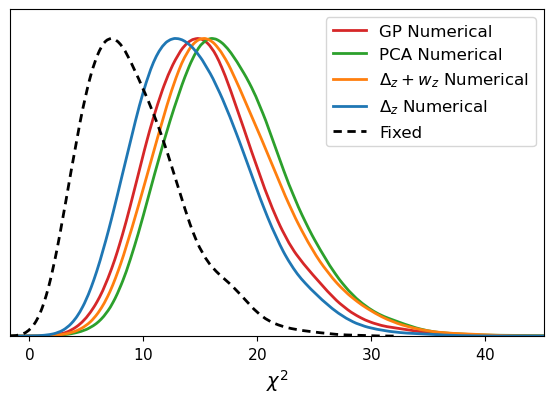

In [29]:
g = plots.get_single_plotter(width_inch=6)
g.plot_1d([
    samples_3x2_nuisance_gp_num,
    samples_3x2_nuisance_PCA_num,
    samples_3x2_nuisance_wzdz_num,
    samples_3x2_nuisance_dz_num,
    samples_3x2_nuisance_nomarg,
    ], 'Xi2', 
    colors=['C3', 'C2', 'C1', 'C0', "black"],
    ls=['-', '-', '-', '-', '--'], 
    lws=2)
g.add_legend(['GP Numerical', 'PCA Numerical', r'$\Delta_z + w_z$ Numerical', r'$\Delta_z$ Numerical', 'Fixed'])

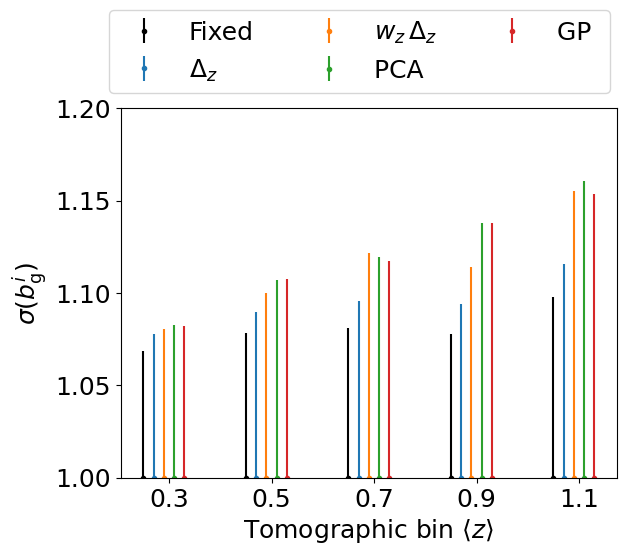

In [35]:
zarr = [0.3, 0.5, 0.7, 0.9, 1.1]
chains = [chain_3x2_nuisance_nomarg,
          chain_3x2_nuisance_dz_num,
          chain_3x2_nuisance_wzdz_num,
          chain_3x2_nuisance_PCA_num,
          chain_3x2_nuisance_gp_num,
          ]
e = -0.05
colors = ['black', 'C0', 'C1', 'C2', 'C3']
labels = ['Fixed', r'$\Delta_z$ ', r'$w_z \, \Delta_z$ ', 'PCA ',  'GP ']
for i, chain in enumerate(chains):
    lens_b_1_m, lens_b_1_s = np.mean(chain['lens_0_b']), np.std(chain['lens_0_b'])
    lens_b_2_m, lens_b_2_s = np.mean(chain['lens_1_b']), np.std(chain['lens_1_b'])
    lens_b_3_m, lens_b_3_s = np.mean(chain['lens_2_b']), np.std(chain['lens_2_b'])
    lens_b_4_m, lens_b_4_s = np.mean(chain['lens_3_b']), np.std(chain['lens_3_b'])
    lens_b_5_m, lens_b_5_s = np.mean(chain['lens_4_b']), np.std(chain['lens_4_b'])
    means = np.array([lens_b_1_m, lens_b_2_m, lens_b_3_m, lens_b_4_m, lens_b_5_m])
    errs = np.array([lens_b_1_s, lens_b_2_s, lens_b_3_s, lens_b_4_s, lens_b_5_s])
    mean = np.mean(means)
    #errs /= means
    #means /= means
    color = colors[i]
    label = labels[i]
    plt.errorbar(np.array(zarr)+e, np.ones_like(means), yerr=errs, fmt='.', color=color, label=label)
    plt.xticks(zarr)
    plt.xlabel(r'Tomographic bin $\langle z \rangle$')
    plt.ylabel(r'$\sigma (b_{\rm g}^i)$')
    plt.legend(ncols=3, bbox_to_anchor=(-0.05, 1.3), loc='upper left')
    plt.ylim(1, 1.2)
    e += 0.02

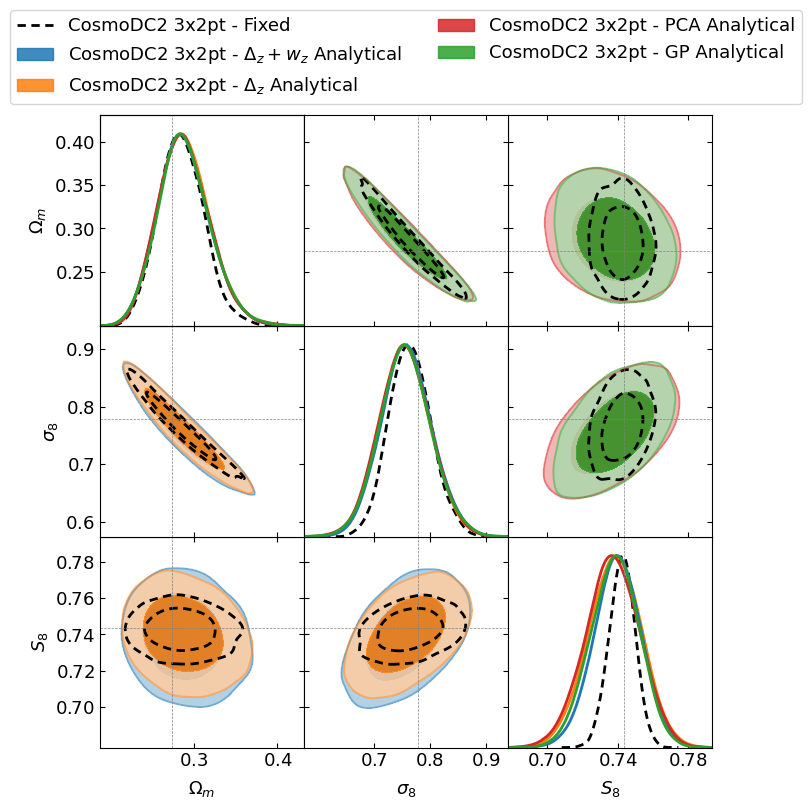

In [31]:
g = plots.getSubplotPlotter(subplot_size=2.5)
g.settings.axes_fontsize = 15
g.settings.legend_fontsize = 15
g.settings.axes_labelsize = 15
g.triangle_plot([samples_3x2_nuisance_nomarg,
                samples_3x2_nuisance_wzdz_ana,
                samples_3x2_nuisance_dz_ana,
                 ],
                 ['Ωm', 'σ8', 'S8'],
                 upper_roots = [samples_3x2_nuisance_nomarg,
                                samples_3x2_nuisance_PCA_ana,
                                samples_3x2_nuisance_gp_ana,
                                ],
                 upper_kwargs = {'contour_colors':['black', 'C3', 'C2'],
                                'contour_ls': ['--', '-', '-'], 
                                    'filled': [False, True, True],
                                    'contour_lws':2}, 
                line_args=[{'color':'black'},
                           {'color':'C1'},
                           {'color':'C0'}], 
                colors=["black", 'C0', 'C1'],
                #param_limits={'Ωm':(0.25, 0.3), 'σ8':(0.75, 0.82), 'S8':(0.735, 0.752)},
                filled=[False, True, True],
                contour_ls=['--', '-', '-'], 
                contour_lws=2,
                legend_ncol=2,
                 markers=prat_markers)
g.export("./paper_plots/Y1_triangle_comp.pdf")

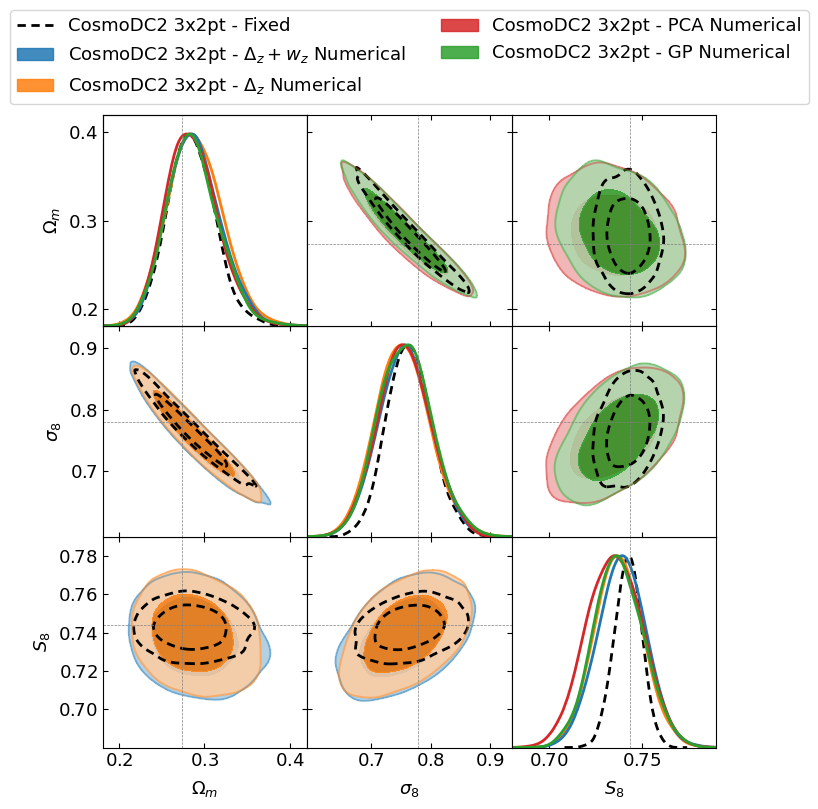

In [32]:
g = plots.getSubplotPlotter(subplot_size=2.5)
g.settings.axes_fontsize = 15
g.settings.legend_fontsize = 15
g.settings.axes_labelsize = 15
g.triangle_plot([samples_3x2_nuisance_nomarg,
                samples_3x2_nuisance_wzdz_num,
                samples_3x2_nuisance_dz_num,
                 ],
                 ['Ωm', 'σ8', 'S8'],
                 upper_roots = [samples_3x2_nuisance_nomarg,
                                samples_3x2_nuisance_PCA_num,
                                samples_3x2_nuisance_gp_num,
                                ],
                 upper_kwargs = {'contour_colors':['black', 'C3', 'C2'],
                                'contour_ls': ['--', '-', '-'], 
                                    'filled': [False, True, True],
                                    'contour_lws':2}, 
                line_args=[{'color':'black'},
                           {'color':'C1'},
                           {'color':'C0'}], 
                colors=["black", 'C0', 'C1'],
                #param_limits={'Ωm':(0.25, 0.3), 'σ8':(0.75, 0.82), 'S8':(0.735, 0.752)},
                filled=[False, True, True],
                contour_ls=['--', '-', '-'], 
                contour_lws=2,
                legend_ncol=2,
                 markers=prat_markers)
g.export("./paper_plots/Y1_triangle_comp.pdf")

In [33]:
g = plots.getSubplotPlotter(subplot_size=3)
g.settings.axes_fontsize = 20
g.settings.legend_fontsize = 20
g.settings.axes_labelsize = 20
g.triangle_plot([
    samples_3x2_nuisance_wzdz_num,
    samples_wzdz_prior,
    ],
    ['dz_lens_0', 'dz_lens_1', 'dz_lens_2', 'dz_lens_3', 'dz_lens_4',
        'dz_source_0', 'dz_source_1', 'dz_source_2', 'dz_source_3', 'dz_source_4',
        'wz_lens_0', 'wz_lens_1', 'wz_lens_2', 'wz_lens_3', 'wz_lens_4',
        'wz_source_0', 'wz_source_1', 'wz_source_2', 'wz_source_3', 'wz_source_4'],
    line_args=[
            {'color':'C1'},
            {'color':'black'}], 
    colors=['C1',  "black"],
    param_limits={'σ8':(0.25, 1.4), 
                    'lens_0_b':(0.3, 2.3),
                    'lens_1_b':(0.4, 2.5),
                    'lens_2_b':(0.5, 2.7),
                    'lens_3_b':(0.5, 3.0),
                    'lens_4_b':(0.6, 3.0),
                  },
    filled=[True, False],
    contour_ls=['-','--'], 
    contour_lws=2,
    markers=prat_markers)
#g.export("./paper_plots/triangle_comp.pdf")

Error in callback <function flush_figures at 0x78361787b9c0> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

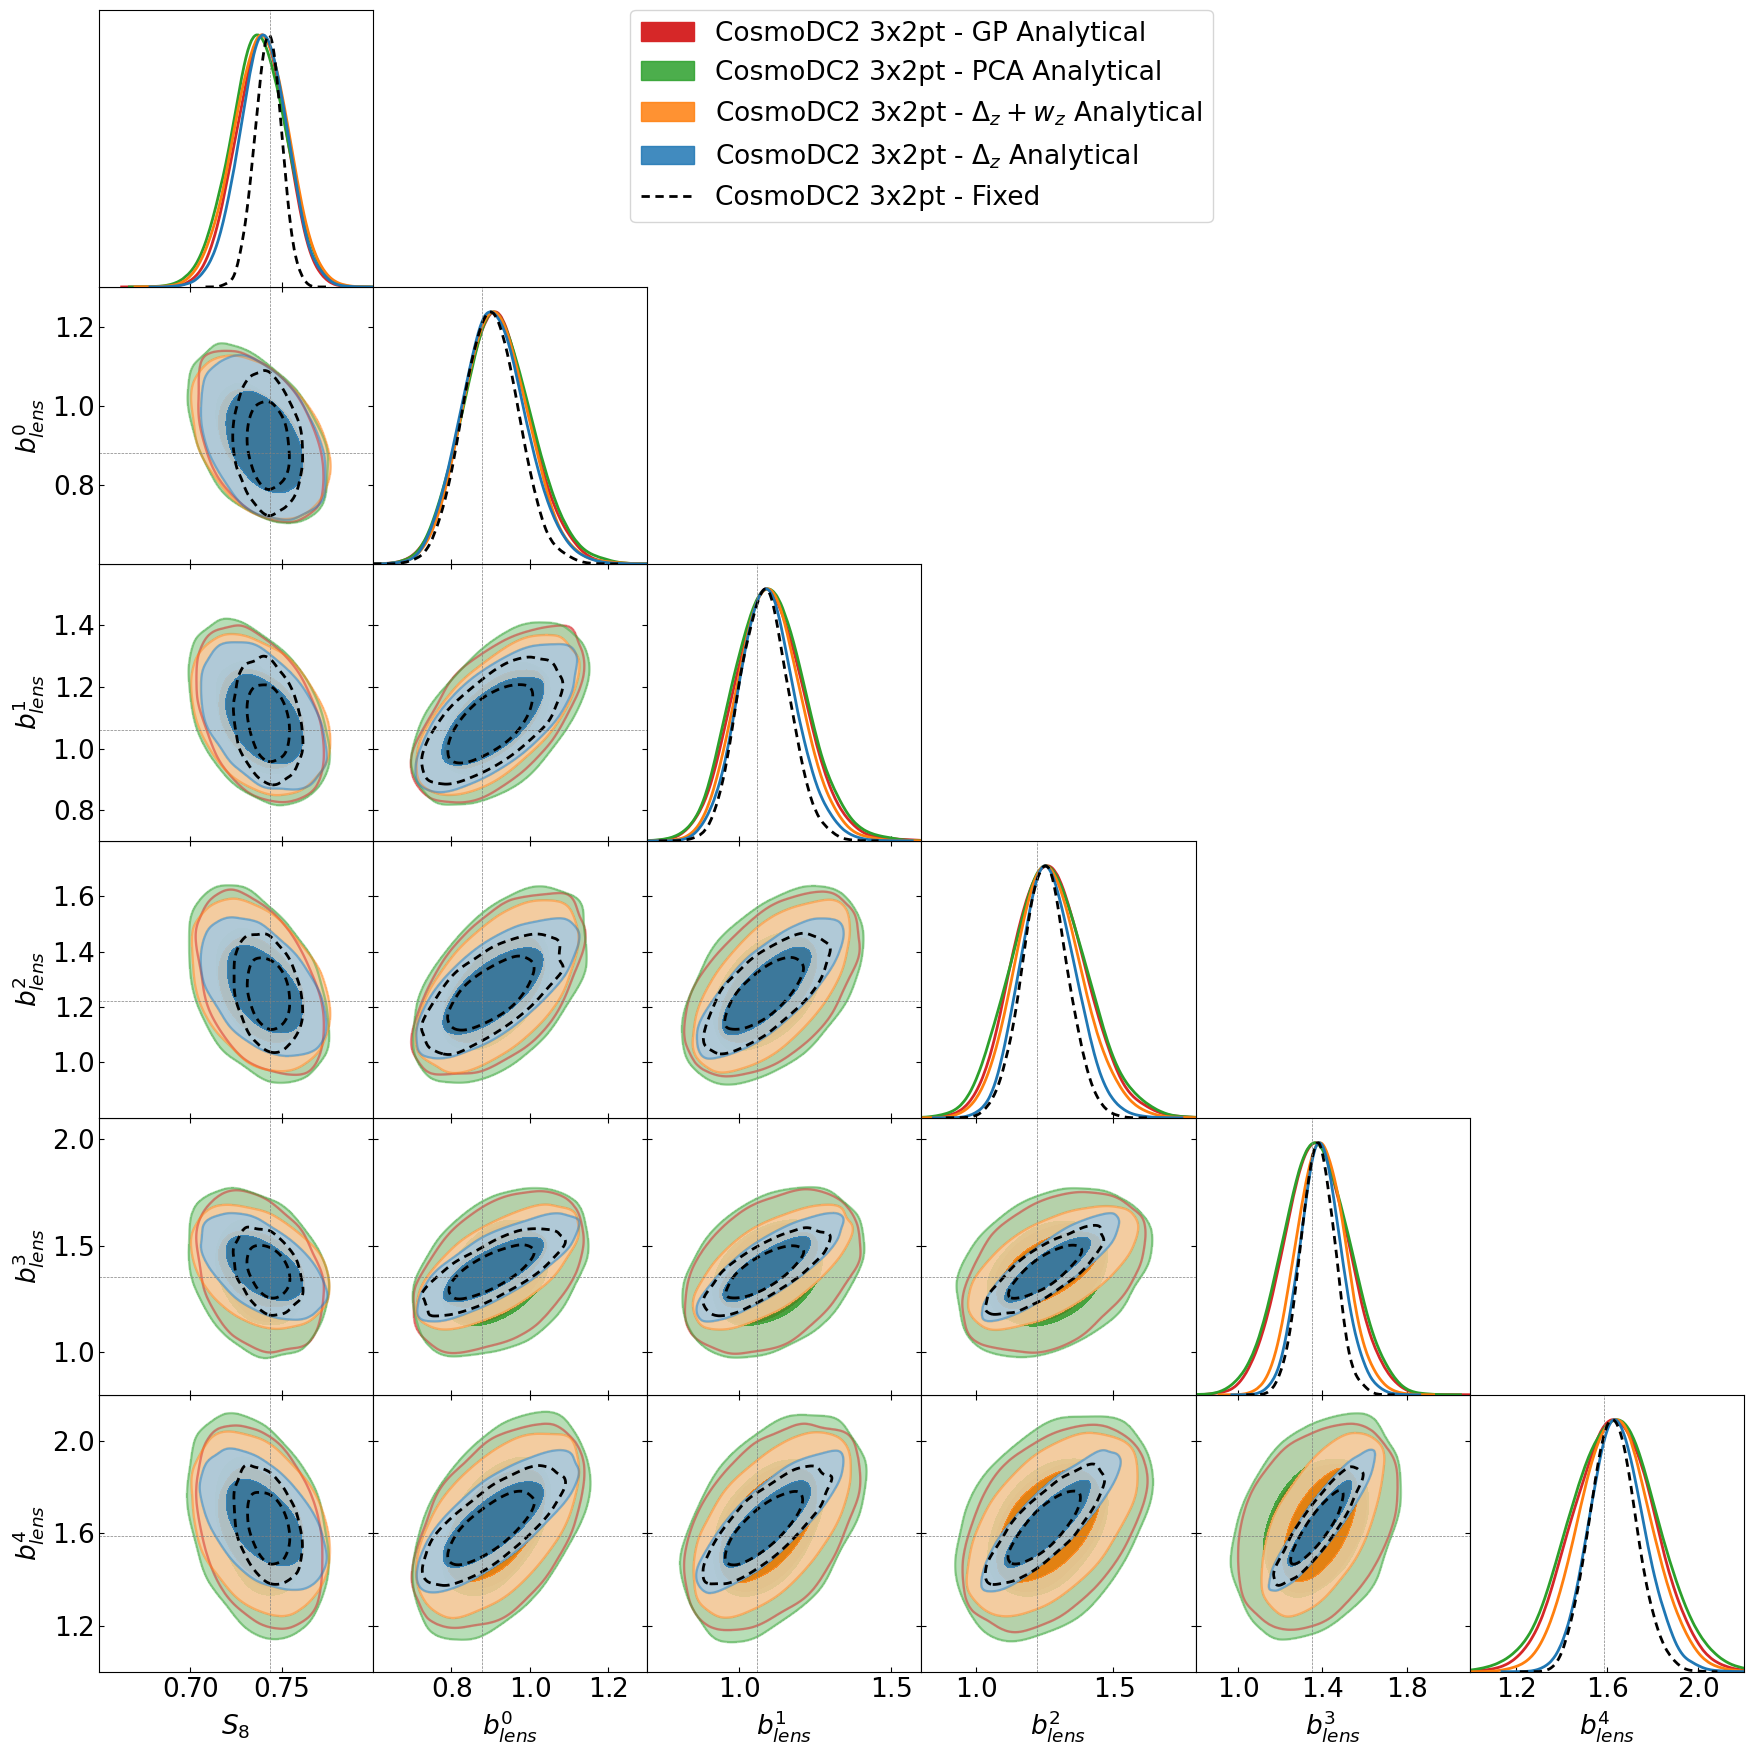

In [ ]:
g = plots.getSubplotPlotter(subplot_size=3)
g.settings.axes_fontsize = 20
g.settings.legend_fontsize = 20
g.settings.axes_labelsize = 20
g.triangle_plot([
    samples_3x2_nuisance_gp_ana,
    samples_3x2_nuisance_PCA_ana,
    samples_3x2_nuisance_wzdz_ana,
    samples_3x2_nuisance_dz_ana,
    samples_3x2_nuisance_nomarg,
    ],
    ['S8', 
     'lens_0_b', 
     'lens_1_b',
     'lens_2_b',
     'lens_3_b',
     'lens_4_b',],
    line_args=[
            {'color':'C3'},
            {'color':'C2'},
            {'color':'C1'},
            {'color':'C0'},
            {'color':'black'}], 
    colors=['C3', 'C2', 'C1', 'C0', "black"],
    param_limits={'S8':(0.65, 0.8), 
                'lens_0_b':(0.6, 1.3),
                'lens_1_b':(0.7, 1.6),
                'lens_2_b':(0.8, 1.8),
                'lens_3_b':(0.8, 2.1),
                'lens_4_b':(1., 2.2),
                },
    filled=[True, True, True, True, False],
    contour_ls=['-', '-', '-', '-', '--'], 
    contour_lws=2,
    markers=prat_markers)
#g.export("./paper_plots/triangle_bias.pdf")

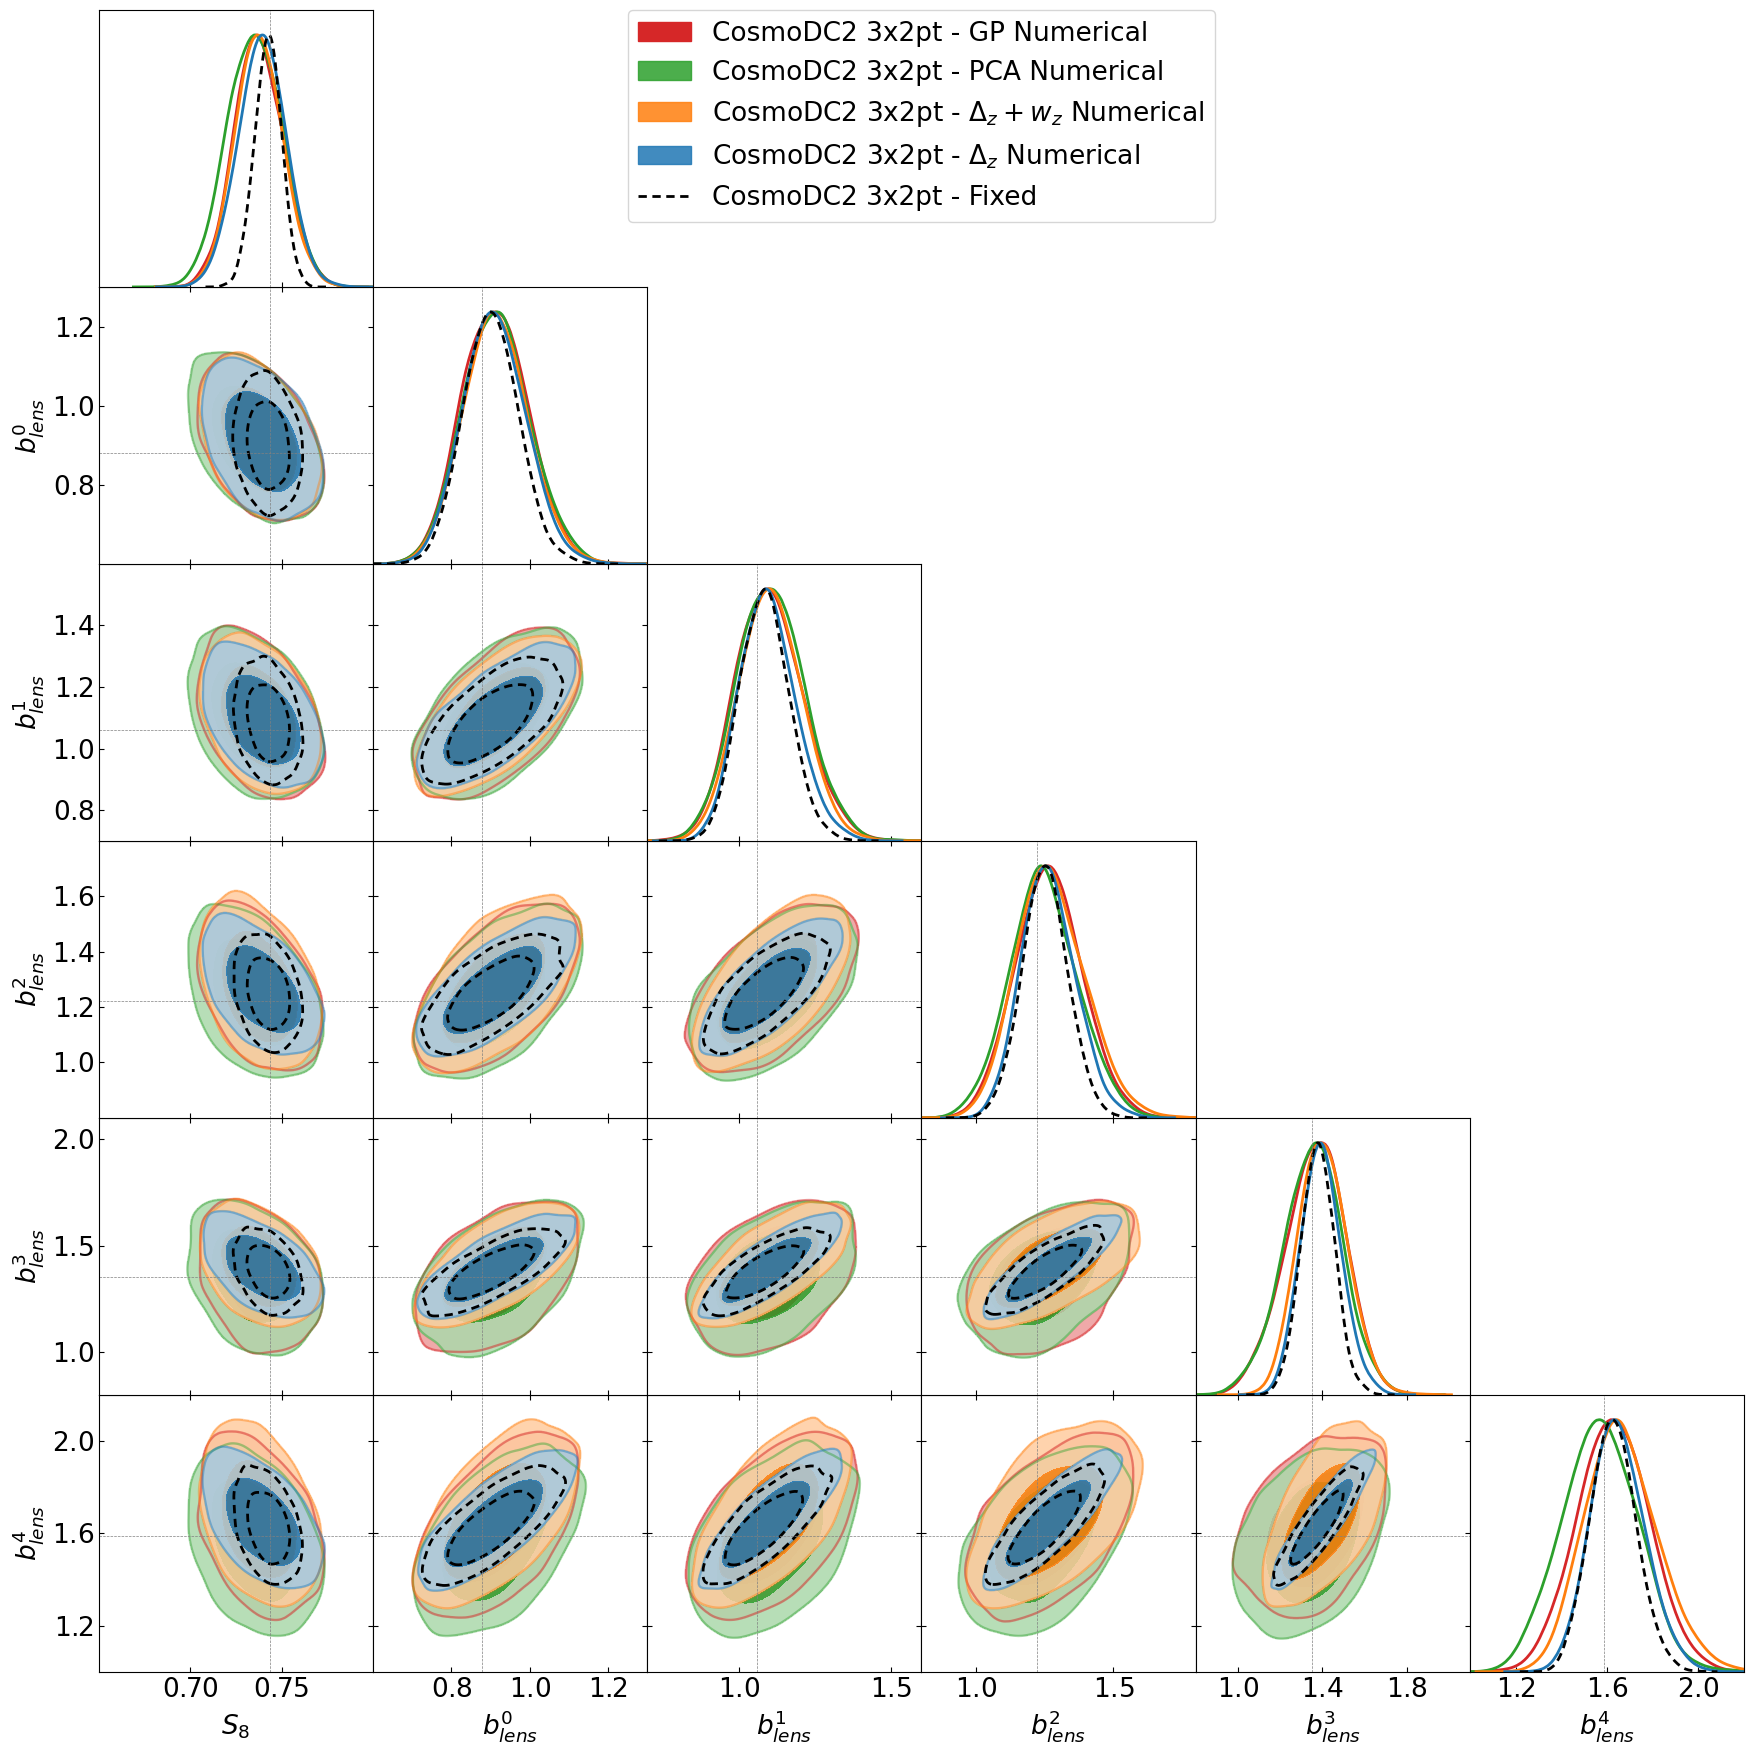

In [ ]:
g = plots.getSubplotPlotter(subplot_size=3)
g.settings.axes_fontsize = 20
g.settings.legend_fontsize = 20
g.settings.axes_labelsize = 20
g.triangle_plot([
    samples_3x2_nuisance_gp_num,
    samples_3x2_nuisance_PCA_num,
    samples_3x2_nuisance_wzdz_num,
    samples_3x2_nuisance_dz_num,
    samples_3x2_nuisance_nomarg,
    ],
    ['S8', 
     'lens_0_b', 
     'lens_1_b',
     'lens_2_b',
     'lens_3_b',
     'lens_4_b',],
    line_args=[
            {'color':'C3'},
            {'color':'C2'},
            {'color':'C1'},
            {'color':'C0'},
            {'color':'black'}], 
    colors=['C3', 'C2', 'C1', 'C0', "black"],
    param_limits={'S8':(0.65, 0.8), 
                'lens_0_b':(0.6, 1.3),
                'lens_1_b':(0.7, 1.6),
                'lens_2_b':(0.8, 1.8),
                'lens_3_b':(0.8, 2.1),
                'lens_4_b':(1., 2.2),
                },
    filled=[True, True, True, True, False],
    contour_ls=['-', '-', '-', '-', '--'], 
    contour_lws=2,
    markers=prat_markers)
g.export("./paper_plots/triangle_bias.pdf")

In [ ]:
g = plots.getSubplotPlotter(subplot_size=3)
g.settings.axes_fontsize = 20
g.settings.legend_fontsize = 20
g.settings.axes_labelsize = 20
g.triangle_plot([
    #samples_3x2_Y1_gp_num,
    #samples_3x2_Y1_PCA_num,
    samples_3x2_nuisance_wzdz_num,
    samples_3x2_nuisance_dz_num,
    samples_wzdz_prior,
    ],
    ['Ωm',
     'ns',
     'Ωb',
     'h',
     'σ8',
     'S8',
     'A_IA',
     'lens_0_b', 
     'lens_1_b',
     'lens_2_b',
     'lens_3_b',
     'lens_4_b',],
    line_args=[
            {'color':'C1'},
            {'color':'C0'},
            {'color':'black'}], 
    colors=['C1', 'C0', "black"],
    #param_limits={'S8':(0.65, 0.8), 
    #            'lens_0_b':(0.6, 1.3),
    #            'lens_1_b':(0.7, 1.6),
    #            'lens_2_b':(0.8, 1.8),
    #            'lens_3_b':(0.8, 2.1),
    #            'lens_4_b':(1., 2.2),
    #            },
    filled=[ True, True, False],
    contour_ls=['-', '-', '--'], 
    contour_lws=2,
    markers=prat_markers)
g.export("./paper_plots/triangle_bias.pdf")

/home/jaimerzp/anaconda3/envs/gitd/lib/python3.13/site-packages/getdist/plots.py:2020: UserWarning: Legend does not support handles for NoneType instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/users/explain/axes/legend_guide.html#controlling-the-legend-entries
  self.legend = self.fig.legend(lines, legend_labels, loc=legend_loc, **args)


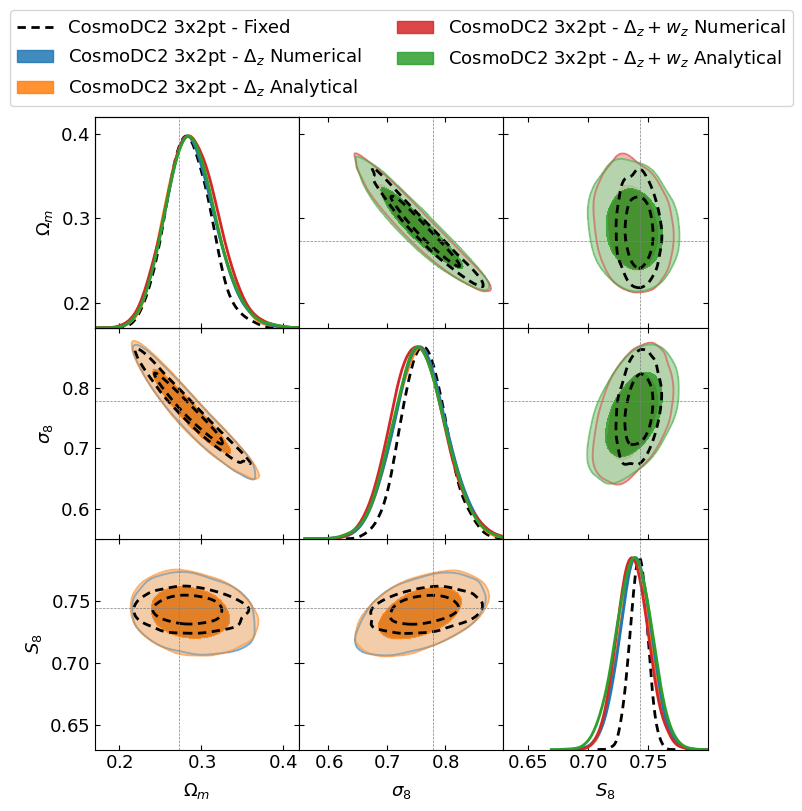

In [ ]:
g = plots.getSubplotPlotter(subplot_size=2.5)
g.settings.axes_fontsize = 15
g.settings.legend_fontsize = 15
g.settings.axes_labelsize = 15
g.triangle_plot([samples_3x2_nuisance_nomarg,
                samples_3x2_nuisance_dz_num,
                samples_3x2_nuisance_dz_ana,
                 ],
                 ['Ωm', 'Ωb', 'h', 'ns', 'σ8', 'S8'],
                 upper_roots = [samples_3x2_nuisance_nomarg,
                                samples_3x2_nuisance_wzdz_num,
                                samples_3x2_nuisance_wzdz_ana,
                                ],
                 upper_kwargs = {'contour_colors':['black', 'C3', 'C2'],
                                'contour_ls': ['--', '-', '-'], 
                                    'filled': [False, True, True],
                                    'contour_lws':2}, 
                line_args=[{'color':'black'},
                           {'color':'C1'},
                           {'color':'C0'}], 
                colors=["black", 'C0', 'C1'],
                param_limits={'Ωm':(0.17, 0.42), 'σ8':(0.55, 0.9), 'S8':(0.63, 0.8)},
                filled=[False, True, True],
                contour_ls=['--', '-', '-'], 
                contour_lws=2,
                legend_ncol=2,
                 markers=prat_markers)
g.export("./paper_plots/triangle_1.pdf")

In [ ]:
g = plots.getSubplotPlotter(subplot_size=2.5)
g.settings.axes_fontsize = 15
g.settings.legend_fontsize = 15
g.settings.axes_labelsize = 15
g.triangle_plot([samples_3x2_nuisance_nomarg,
                 samples_3x2_nuisance_PCA_num,
                 samples_3x2_nuisance_PCA_ana,
                 ],
                 ['Ωm', 'Ωb', 'h', 'ns', 'σ8', 'S8'],
                 upper_roots = [samples_3x2_nuisance_nomarg,
                                samples_3x2_nuisance_gp_num,
                                samples_3x2_nuisance_gp_ana,
                                ],
                 upper_kwargs = {'contour_colors':['black', 'C3', 'C2'],
                                'contour_ls': ['--', '-', '-'], 
                                    'filled': [False, True, True],
                                    'contour_lws':2}, 
                line_args=[{'color':'black'},
                           {'color':'C0'},
                           {'color':'C1'}], 
                colors=["black", 'C0', 'C1'],
                param_limits={'Ωm':(0.17, 0.42), 'σ8':(0.55, 0.9), 'S8':(0.63, 0.8)},
                filled=[False, True, True],
                contour_ls=['--', '-', '-'], 
                contour_lws=2,
                legend_ncol=2,
                 markers=prat_markers)
g.export("./paper_plots/triangle_2.pdf")

NameError: name 'plots' is not defined

In [ ]:
def make_table(params):
    for param in params:
        if param == "S8":
            param_nomarg = chain_3x2_nuisance_nomarg["σ8"] * np.sqrt(chain_3x2_nuisance_nomarg["Ωm"] / 0.3)
            param_dz_ana = chain_3x2_nuisance_dz_ana["σ8"] * np.sqrt(chain_3x2_nuisance_dz_ana["Ωm"] / 0.3)
            param_wzdz_ana = chain_3x2_nuisance_wzdz_ana["σ8"] * np.sqrt(chain_3x2_nuisance_wzdz_ana["Ωm"] / 0.3)
            param_PCA_ana = chain_3x2_nuisance_PCA_ana["σ8"] * np.sqrt(chain_3x2_nuisance_PCA_ana["Ωm"] / 0.3)
            param_gp_ana = chain_3x2_nuisance_gp_ana["σ8"] * np.sqrt(chain_3x2_nuisance_gp_ana["Ωm"] / 0.3)
            param_dz_num = chain_3x2_nuisance_dz_num["σ8"] * np.sqrt(chain_3x2_nuisance_dz_num["Ωm"] / 0.3)
            param_wzdz_num = chain_3x2_nuisance_wzdz_num["σ8"] * np.sqrt(chain_3x2_nuisance_wzdz_num["Ωm"] / 0.3) 
            param_PCA_num = chain_3x2_nuisance_PCA_num["σ8"] * np.sqrt(chain_3x2_nuisance_PCA_num["Ωm"] / 0.3)
            param_gp_num = chain_3x2_nuisance_gp_num["σ8"]  * np.sqrt(chain_3x2_nuisance_gp_num["Ωm"] / 0.3)
        else:
            param_nomarg = chain_3x2_nuisance_nomarg[param]
            param_dz_ana = chain_3x2_nuisance_dz_ana[param]
            param_wzdz_ana = chain_3x2_nuisance_wzdz_ana[param]
            param_PCA_ana = chain_3x2_nuisance_PCA_ana[param]
            param_gp_ana = chain_3x2_nuisance_gp_ana[param]
            param_dz_num = chain_3x2_nuisance_dz_num[param]
            param_wzdz_num = chain_3x2_nuisance_wzdz_num[param]
            param_PCA_num = chain_3x2_nuisance_PCA_num[param]
            param_gp_num = chain_3x2_nuisance_gp_num[param]

        nomarg_std = np.std(param_nomarg)
        dz_std_num = np.std(param_dz_num)
        wzdz_std_num = np.std(param_wzdz_num)
        PCA_std_num = np.std(param_PCA_num)
        gp_std_num = np.std(param_gp_num)
        dz_std_ana = np.std(param_dz_ana)
        wzdz_std_ana = np.std(param_wzdz_ana)
        PCA_std_ana = np.std(param_PCA_ana)
        gp_std_ana = np.std(param_gp_ana)

        print("$", labels_dict[param], "$",
            #"&", np.round(np.mean(param_nomarg),4), "$\pm$", np.round(np.std(param_nomarg),4),
            "&", np.round((dz_std_ana-nomarg_std)/nomarg_std,4),
            "&", np.round((wzdz_std_ana-nomarg_std)/nomarg_std,4),
            "&", np.round((PCA_std_ana-nomarg_std)/nomarg_std,4),
            "&", np.round((gp_std_ana-nomarg_std)/nomarg_std,4),
            "&", np.round((dz_std_num-nomarg_std)/nomarg_std,4),
            "&", np.round((wzdz_std_num-nomarg_std)/nomarg_std,4),
            "&", np.round((PCA_std_num-nomarg_std)/nomarg_std,4),
            "&", np.round((gp_std_num-nomarg_std)/nomarg_std,4),
            "\\\\")
        print("\\hline")



In [ ]:
make_table(["Ωm", "σ8", "S8", "Ωb", "h", "ns", "A_IA", "lens_0_b", "lens_1_b", "lens_2_b", "lens_3_b", "lens_4_b"])

$ \Omega_m $ & 0.1309 & 0.1361 & 0.1325 & 0.1508 & 0.1201 & 0.1777 & 0.0991 & 0.1126 \\
\hline
$ \sigma_8 $ & 0.1898 & 0.1903 & 0.2152 & 0.2229 & 0.1692 & 0.2111 & 0.1744 & 0.1996 \\
\hline
$ S_8 $ & 0.8139 & 1.0202 & 1.0543 & 0.8618 & 0.7716 & 0.7635 & 1.0107 & 0.8214 \\
\hline
$ \Omega_b $ & 0.0625 & 0.0494 & 0.0561 & 0.0466 & 0.0332 & 0.0368 & 0.0497 & 0.0493 \\
\hline
$ h $ & 0.0309 & 0.0281 & 0.0126 & 0.0001 & 0.0433 & 0.0243 & 0.0146 & 0.0597 \\
\hline
$ n_s $ & 0.0067 & 0.0289 & 0.0024 & 0.0107 & 0.0188 & 0.0096 & -0.0175 & -0.0215 \\
\hline
$ A_{IA} $ & 0.6917 & 0.7282 & 0.7164 & 0.6263 & 0.6571 & 0.63 & 0.7448 & 0.5157 \\
\hline
$ b_{lens}^{0} $ & 0.1619 & 0.1681 & 0.2588 & 0.217 & 0.1401 & 0.178 & 0.2106 & 0.1976 \\
\hline
$ b_{lens}^{1} $ & 0.1649 & 0.2764 & 0.4578 & 0.415 & 0.1445 & 0.2747 & 0.371 & 0.3724 \\
\hline
$ b_{lens}^{2} $ & 0.1949 & 0.4551 & 0.6698 & 0.5766 & 0.18 & 0.5 & 0.474 & 0.4444 \\
\hline
$ b_{lens}^{3} $ & 0.2259 & 0.4249 & 0.9565 & 0.8696 & 0.2084 & 0.4

/tmp/ipykernel_33115/94669721.py:63: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(fontsize=11, frameon=False)


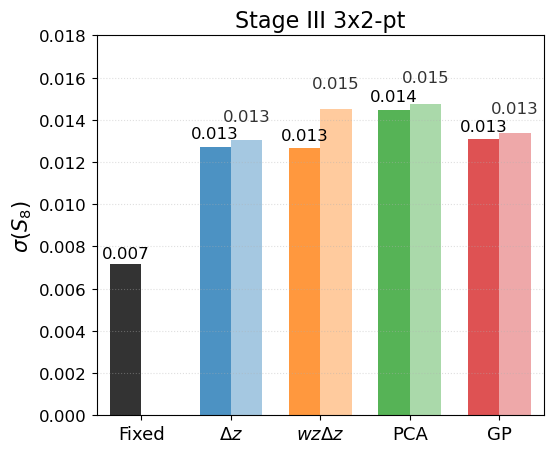

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Prepare data
methods = ['Fixed', r'$\Delta z$', r'$wz\Delta z$', 'PCA', 'GP']
colors = ['k', 'C0', 'C1', 'C2', 'C3']

def compute_sigma(chain, param='σ8'):
    p = chain[param] * np.sqrt(chain["Ωm"] / 0.3)
    return np.std(p)

# Compute std deviations for each method (numerical + analytical)
p_fixed_s_num = compute_sigma(chain_3x2_nuisance_nomarg)
p_fixed_s_ana = np.nan  # no analytical version for fixed model

p_dz_s_num    = compute_sigma(chain_3x2_nuisance_dz_num)
p_dz_s_ana    = compute_sigma(chain_3x2_nuisance_dz_ana)

p_wzdz_s_num  = compute_sigma(chain_3x2_nuisance_wzdz_num)
p_wzdz_s_ana  = compute_sigma(chain_3x2_nuisance_wzdz_ana)

p_pca_s_num   = compute_sigma(chain_3x2_nuisance_PCA_num)
p_pca_s_ana   = compute_sigma(chain_3x2_nuisance_PCA_ana)

p_gp_s_num    = compute_sigma(chain_3x2_nuisance_gp_num)
p_gp_s_ana    = compute_sigma(chain_3x2_nuisance_gp_ana)

sigmas_num = [p_fixed_s_num, p_dz_s_num, p_wzdz_s_num, p_pca_s_num, p_gp_s_num]
sigmas_ana = [np.nan,        p_dz_s_ana, p_wzdz_s_ana, p_pca_s_ana, p_gp_s_ana]

# --------------------------------------------
# Plot setup: two bars per method (num vs ana)
# --------------------------------------------
fig, ax = plt.subplots(figsize=(6, 5))

xpos = np.arange(len(methods))
bar_width = 0.35

# Plot numerical (solid) and analytical (transparent)
bars_num = ax.bar(xpos - bar_width/2, sigmas_num, width=bar_width,
                  color=colors, alpha=0.8,)
bars_ana = ax.bar(xpos + bar_width/2, sigmas_ana, width=bar_width,
                  color=colors, alpha=0.4)

# Aesthetics
ax.set_xticks(xpos)
ax.set_xticklabels(methods, fontsize=13)
ax.set_ylabel(r'$\sigma(S_8)$', fontsize=15)
ax.tick_params(axis='y', labelsize=12)
ax.grid(axis='y', linestyle=':', alpha=0.4)
ax.set_xlim(-0.5, len(methods)-0.5)
ax.set_ylim(0, 0.018)    

# Annotate values above bars
for x, s in zip(xpos, sigmas_num):
    if not np.isnan(s):
        ax.text(x - bar_width/2, s * 1.02, f"{s:.3f}", ha='center', va='bottom', fontsize=12)
for x, s in zip(xpos, sigmas_ana):
    if not np.isnan(s):
        ax.text(x + bar_width/2, s * 1.06, f"{s:.3f}", ha='center', va='bottom', fontsize=12, alpha=0.8)

# Legend & title
ax.legend(fontsize=11, frameon=False)
plt.title("Stage III 3x2-pt", fontsize=16)
plt.tight_layout()
plt.savefig("./paper_plots/S8_comp.pdf", bbox_inches='tight', pad_inches=0)


In [ ]:
print((0.01272-0.01271)/0.01271)
print((-0.01272+0.01450)/0.01271)
print((-0.01272+0.01307)/0.01271)

0.0007867820613689687
0.14004720692368217
0.027537372147914997


## Shifts and Widths

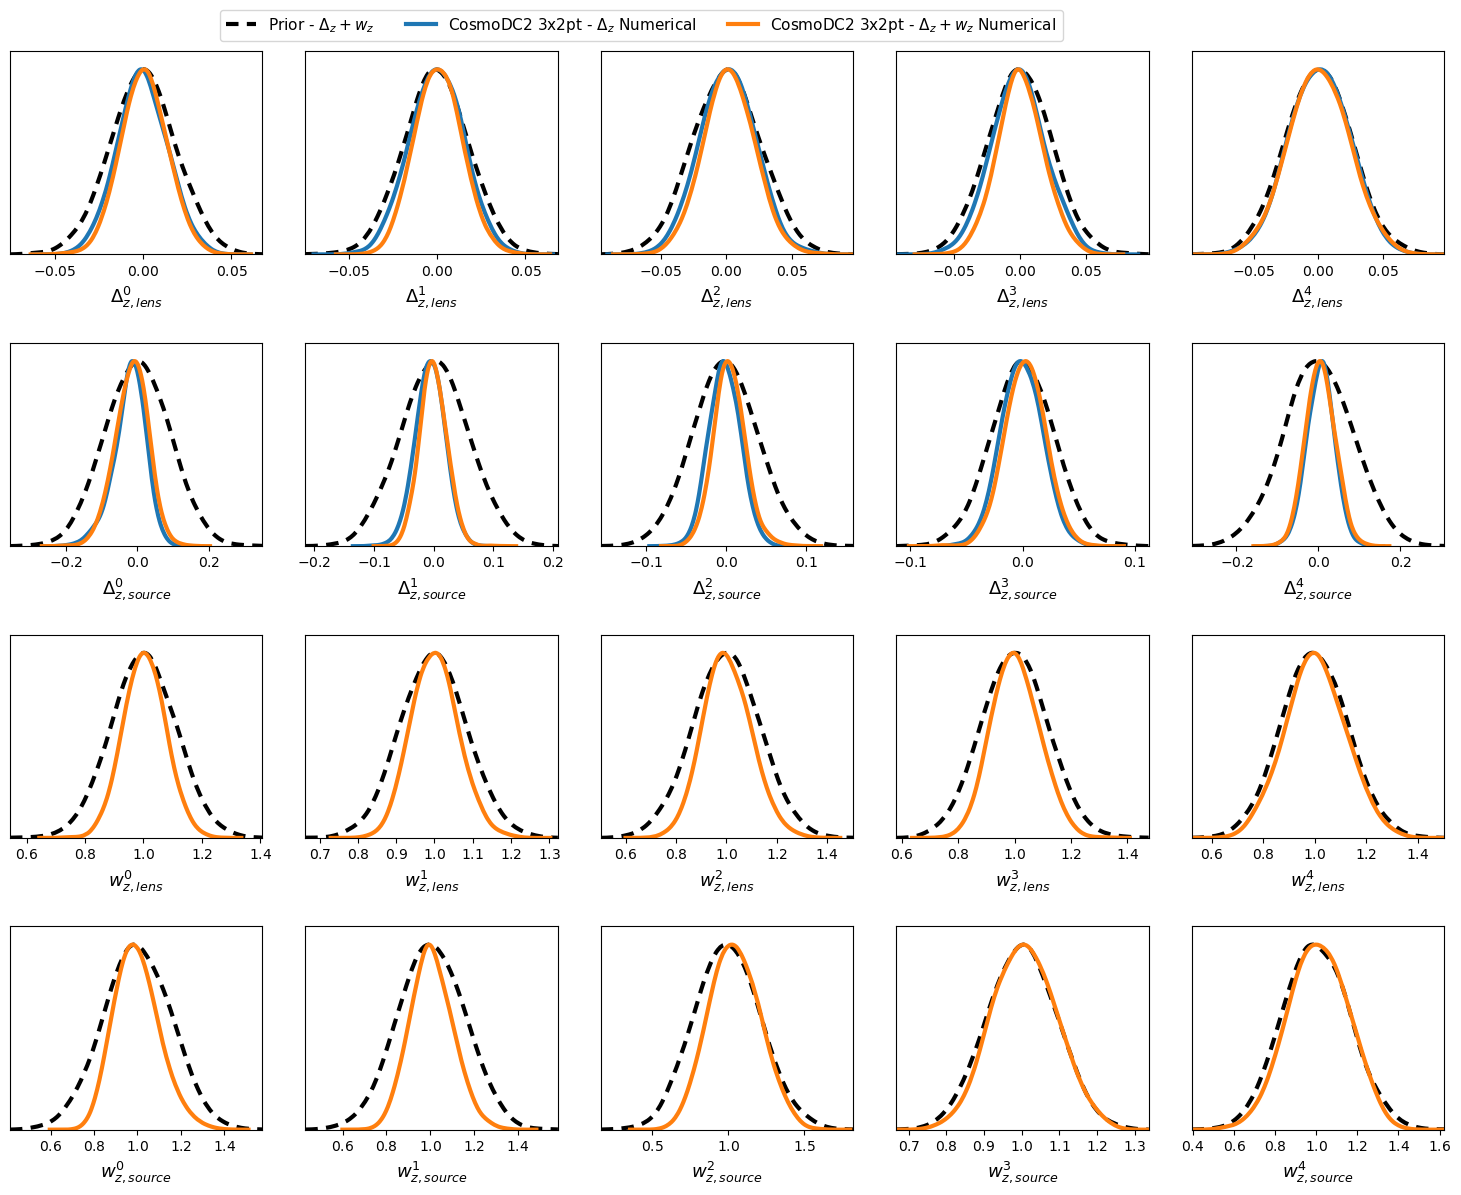

In [ ]:
g = plots.get_subplot_plotter(width_inch=15)
g.plots_1d([samples_wzdz_prior,
            samples_3x2_nuisance_dz_num,
            samples_3x2_nuisance_wzdz_num
            ], 
           ['dz_lens_0', 'dz_lens_1', 'dz_lens_2', 'dz_lens_3', 'dz_lens_4',
            'dz_source_0', 'dz_source_1', 'dz_source_2', 'dz_source_3', 'dz_source_4',
            'wz_lens_0', 'wz_lens_1', 'wz_lens_2', 'wz_lens_3', 'wz_lens_4',
            'wz_source_0', 'wz_source_1', 'wz_source_2', 'wz_source_3', 'wz_source_4'],
            lws=3, ls=['--', '-', '-'], 
            colors=["black", 'C0', 'C1'],
            nx=5, legend_ncol=3);

g.export("./paper_plots/wzdz.pdf")

## Nzs

In [ ]:
import nz_prior as nzp


nz_path = "./data/CosmoDC2/nzs_lognormal/gp_priors/"
nzs = {
"lens_0": np.load(nz_path+"gp_lens_0.npz"),
"lens_1": np.load(nz_path+"gp_lens_1.npz"),
"lens_2": np.load(nz_path+"gp_lens_2.npz"),
"lens_3": np.load(nz_path+"gp_lens_3.npz"),
"lens_4": np.load(nz_path+"gp_lens_4.npz"),
"source_0": np.load(nz_path+"gp_source_0.npz"),
"source_1": np.load(nz_path+"gp_source_1.npz"),
"source_2": np.load(nz_path+"gp_source_2.npz"),
"source_3": np.load(nz_path+"gp_source_3.npz"),
"source_4": np.load(nz_path+"gp_source_4.npz"),
}
gp_nzs = {}
chain = chain_3x2_nuisance_gp_num
for tracer_name in list(s_3x2.tracers.keys()):
    nz = nzs[tracer_name]
    nz_mean = nz["dndz"]
    z = nz["z"]
    W = nz["W"] 
    _, n = W.shape
    param_names = ["alphas_"+tracer_name+"[{}]".format(i) for i in range(1, 5+1)]
    alphas = [chain_3x2_nuisance_gp_num[param_name].values for param_name in param_names]
    alphas = np.array(alphas).T
    n_samples = alphas.shape[0]
    _nzs = [nz_mean + np.dot(W, alphas[i, :]) for i in range(n_samples)]
    _nzs = [_nz/np.sum(_nz) for _nz in _nzs] 
    gp_nzs[tracer_name] = _nzs

In [ ]:
nz_path = "./data/CosmoDC2/nzs_lognormal/PCA_priors/"
nzs = {
"lens_0": np.load(nz_path+"PCA_lens_0.npz"),
"lens_1": np.load(nz_path+"PCA_lens_1.npz"),
"lens_2": np.load(nz_path+"PCA_lens_2.npz"),
"lens_3": np.load(nz_path+"PCA_lens_3.npz"),
"lens_4": np.load(nz_path+"PCA_lens_4.npz"),
"source_0": np.load(nz_path+"PCA_source_0.npz"),
"source_1": np.load(nz_path+"PCA_source_1.npz"),
"source_2": np.load(nz_path+"PCA_source_2.npz"),
"source_3": np.load(nz_path+"PCA_source_3.npz"),
"source_4": np.load(nz_path+"PCA_source_4.npz"),
}
pca_nzs = {}
chain = chain_3x2_nuisance_PCA_num
for tracer_name in list(s_3x2.tracers.keys()):
    nz = nzs[tracer_name]
    nz_mean = nz["dndz"]
    z = nz["z"]
    W = nz["W"] 
    _, n = W.shape
    param_names = ["alphas_"+tracer_name+"[{}]".format(i) for i in range(1, 5+1)]
    alphas = [chain[param_name].values for param_name in param_names]
    alphas = np.array(alphas).T
    n_samples = alphas.shape[0]
    _nzs = [nz_mean + np.dot(W, alphas[i, :]) for i in range(n_samples)]
    _nzs = [_nz/np.sum(_nz) for _nz in _nzs] 
    pca_nzs[tracer_name] = _nzs

In [ ]:
SnWs_nzs = {}
SnWs_zs = {}
mean_zs = {}
for tracer in list(nzs.keys()):
    mu = np.average(nzs[tracer]["z"], weights=nzs[tracer]["dndz"])
    mean_zs[tracer] = mu
chain = chain_3x2_nuisance_wzdz_num
for tracer_name in list(s_3x2.tracers.keys()):
    nz = nzs[tracer_name]
    nz_mean = nz["dndz"]
    z = nz["z"]
    dzs = chain["dz_lens_{}".format(int(tracer_name[-1]))].values
    wzs = chain["wz_lens_{}".format(int(tracer_name[-1]))].values
    print(tracer_name, "dzs", np.round(np.std(dzs), 4), "wzs", np.round(np.std(wzs), 4))
    mu = mean_zs[tracer_name]
    n_samples = dz.shape[0]
    _zs = [(z-mu+dzs[i])/(wzs[i]) + mu for i in range(n_samples)]
    _nzs = [np.interp(_z, z, nz_mean) for _z in _zs]
    _nzs = [_nz/np.sum(_nz) for _nz in _nzs] 
    SnWs_zs[tracer_name] = _zs
    SnWs_nzs[tracer_name] = _nzs

source_0 dzs 0.013 wzs 0.0712
source_1 dzs 0.0132 wzs 0.061
source_2 dzs 0.0192 wzs 0.0947
source_3 dzs 0.0173 wzs 0.0833
source_4 dzs 0.0229 wzs 0.1146
lens_0 dzs 0.013 wzs 0.0712
lens_1 dzs 0.0132 wzs 0.061
lens_2 dzs 0.0192 wzs 0.0947
lens_3 dzs 0.0173 wzs 0.0833
lens_4 dzs 0.0229 wzs 0.1146


In [ ]:
shifts_nzs = {}
shifts_zs = {}
chain = chain_3x2_nuisance_dz_num
for tracer_name in list(s_3x2.tracers.keys()):
    nz = nzs[tracer_name]
    nz_mean = nz["dndz"]
    z = nz["z"]
    dzs = chain["dz_lens_{}".format(int(tracer_name[-1]))].values
    print(tracer_name, "dzs", np.round(np.std(dzs), 4))
    mu = mean_zs[tracer_name]
    n_samples = dz.shape[0]
    _zs = [z + dzs[i] for i in range(n_samples)]
    _nzs = [np.interp(_z, z, nz_mean) for _z in _zs]
    _nzs = [_nz/np.sum(_nz) for _nz in _nzs] 
    shifts_zs[tracer_name] = _zs
    shifts_nzs[tracer_name] = _nzs

source_0 dzs 0.014
source_1 dzs 0.015
source_2 dzs 0.0207
source_3 dzs 0.0201
source_4 dzs 0.0228
lens_0 dzs 0.014
lens_1 dzs 0.015
lens_2 dzs 0.0207
lens_3 dzs 0.0201
lens_4 dzs 0.0228


In [ ]:
path = "/home/jaimerzp/Documents/UCL/3x2_analytical/data/CosmoDC2/nzs_lognormal/"
data_nzs = {
"lens_0": np.load(path+"/lens_0.npz")["photo_hists"]/np.sum(np.load(path+"/lens_0.npz")["photo_hists"], axis=0),
"lens_1": np.load(path+"/lens_1.npz")["photo_hists"]/np.sum(np.load(path+"/lens_1.npz")["photo_hists"], axis=0),
"lens_2": np.load(path+"/lens_2.npz")["photo_hists"]/np.sum(np.load(path+"/lens_2.npz")["photo_hists"], axis=0),
"lens_3": np.load(path+"/lens_3.npz")["photo_hists"]/np.sum(np.load(path+"/lens_3.npz")["photo_hists"], axis=0),
"lens_4": np.load(path+"/lens_4.npz")["photo_hists"]/np.sum(np.load(path+"/lens_4.npz")["photo_hists"], axis=0),
"source_0": np.load(path+"/source_0.npz")["photo_hists"]/np.sum(np.load(path+"/source_0.npz")["photo_hists"], axis=0),
"source_1": np.load(path+"/source_1.npz")["photo_hists"]/np.sum(np.load(path+"/source_1.npz")["photo_hists"], axis=0),
"source_2": np.load(path+"/source_2.npz")["photo_hists"]/np.sum(np.load(path+"/source_2.npz")["photo_hists"], axis=0),
"source_3": np.load(path+"/source_3.npz")["photo_hists"]/np.sum(np.load(path+"/source_3.npz")["photo_hists"], axis=0),
"source_4": np.load(path+"/source_4.npz")["photo_hists"]/np.sum(np.load(path+"/source_4.npz")["photo_hists"], axis=0),
}

In [ ]:
for key in data_nzs.keys():
    data_cov = np.cov(data_nzs[key])
    shift_cov = np.cov(shifts_nzs[key], rowvar=False)
    SnWs_cov = np.cov(SnWs_nzs[key], rowvar=False)
    pca_cov = np.cov(pca_nzs[key], rowvar=False)
    gp_cov = np.cov(gp_nzs[key], rowvar=False)

    varsum_data = np.sum(np.diag(data_cov))
    varsum_shift = np.sum(np.diag(shift_cov))
    varsum_SnWs = np.sum(np.diag(SnWs_cov))
    varsum_pca = np.sum(np.diag(pca_cov))
    varsum_gp = np.sum(np.diag(gp_cov))

    print(key,
          " & ",
          np.round(varsum_shift / varsum_data, 3),
          " & ",
          np.round(varsum_SnWs / varsum_data, 3),
          " & ",
          np.round(varsum_pca / varsum_data, 3),
          " & ",
          np.round(varsum_gp / varsum_data, 3),
            " \\\\"
          )
    print("\hline")

lens_0  &  0.086  &  0.042  &  0.553  &  0.218  \\
\hline
lens_1  &  0.114  &  0.222  &  0.692  &  0.314  \\
\hline
lens_2  &  0.048  &  0.044  &  0.584  &  0.274  \\
\hline
lens_3  &  0.243  &  0.273  &  0.754  &  0.443  \\
\hline
lens_4  &  0.09  &  0.131  &  0.802  &  0.321  \\
\hline
source_0  &  0.019  &  0.014  &  0.576  &  0.112  \\
\hline
source_1  &  0.044  &  0.141  &  0.622  &  0.33  \\
\hline
source_2  &  0.086  &  0.088  &  0.64  &  0.113  \\
\hline
source_3  &  0.251  &  0.276  &  0.715  &  0.327  \\
\hline
source_4  &  0.017  &  0.067  &  0.576  &  0.194  \\
\hline


<>:25: SyntaxWarning: invalid escape sequence '\h'
<>:25: SyntaxWarning: invalid escape sequence '\h'
/tmp/ipykernel_33115/1970192093.py:25: SyntaxWarning: invalid escape sequence '\h'
  print("\hline")


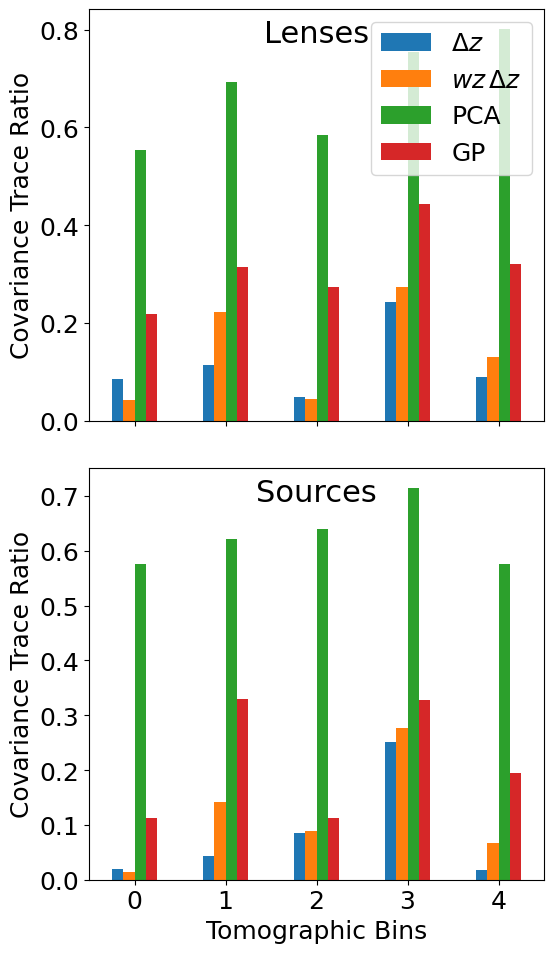

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Create dataframe from extracted table
lens_data = {
    "0": [0.086, 0.042, 0.553, 0.218],
    "1": [0.114, 0.222, 0.692, 0.314],
    "2": [0.048, 0.044, 0.584, 0.274],
    "3": [0.243, 0.273, 0.754, 0.443],
    "4": [0.090, 0.131, 0.802, 0.321],
}
source_data = {
    "0": [0.019, 0.014, 0.576, 0.112],
    "1": [0.044, 0.141, 0.622, 0.330],
    "2": [0.086, 0.088, 0.640, 0.113],
    "3": [0.251, 0.276, 0.715, 0.327],
    "4": [0.017, 0.067, 0.576, 0.194],
}

lens_df = pd.DataFrame(lens_data, index=[r"$\Delta z$", r"$wz \, \Delta z$", "PCA", "GP"]).T
source_df = pd.DataFrame(source_data, index=[r"$\Delta z$", r"$wz \, \Delta z$", "PCA", "GP"]).T
# Separate lenses and sources

# Create subplots
fig, axes = plt.subplots(2, 1, figsize=(6, 10), sharex=True)

# Plot lenses
lens_df.plot(kind="bar", ax=axes[0])
axes[0].set_title("Lenses", y=0.9)
axes[0].set_ylabel("Covariance Trace Ratio")
axes[0].set_xlabel("Tomographic Bins")
axes[0].tick_params(axis='x', rotation=0)

# Plot sources
source_df.plot(kind="bar", ax=axes[1])
axes[1].set_title("Sources", y=0.9)
axes[1].legend_.remove()  # Remove legend from the second plot
axes[1].set_xlabel("Tomographic Bins")
axes[1].tick_params(axis='x', rotation=0)
axes[1].set_ylabel("Covariance Trace Ratio")

# Adjust layout
plt.tight_layout()
plt.savefig("./paper_plots/nz_cov_comp.pdf", bbox_inches='tight', pad_inches=0.1)

In [ ]:
for key in data_nzs.keys():
    cov_data = np.cov(data_nzs[key])
    cov_shifts = np.cov(shifts_nzs[key], rowvar=False)
    cov_SnWs = np.cov(SnWs_nzs[key], rowvar=False)
    cov_pca = np.cov(pca_nzs[key], rowvar=False)
    cov_gp = np.cov(gp_nzs[key], rowvar=False)

    diff_shifts = np.mean(cov_shifts/cov_data)
    diff_SnWs = np.mean(cov_SnWs/np.abs(cov_data))
    diff_pca = np.mean(cov_pca/np.abs(cov_data))
    diff_gp = np.mean(cov_gp/np.abs(cov_data))
    print(key,
          " & ",
          np.round(diff_shifts, 3),
          " & ",
          np.round(diff_SnWs, 3),
          " & ",
          np.round(diff_pca, 3),
          " & ",
          np.round(diff_gp, 3),
            " \\\\"
          )
    print("\hline")

lens_0  &  2.869  &  0.109  &  -0.489  &  0.785  \\
\hline
lens_1  &  0.272  &  3.822  &  -0.113  &  0.766  \\
\hline
lens_2  &  2.999  &  19.394  &  0.266  &  -0.707  \\
\hline
lens_3  &  0.932  &  -2.415  &  0.049  &  0.713  \\
\hline
lens_4  &  2.751  &  -2.76  &  0.802  &  -0.011  \\
\hline
source_0  &  -0.04  &  -0.54  &  0.246  &  -1.864  \\
\hline
source_1  &  -0.042  &  -1.004  &  1.154  &  -1.489  \\
\hline
source_2  &  -0.907  &  3.743  &  1.477  &  -2.47  \\
\hline
source_3  &  0.013  &  0.732  &  0.68  &  0.041  \\
\hline
source_4  &  -0.009  &  -1.967  &  0.434  &  0.2  \\
\hline


<>:23: SyntaxWarning: invalid escape sequence '\h'
<>:23: SyntaxWarning: invalid escape sequence '\h'
/tmp/ipykernel_33115/1770500908.py:23: SyntaxWarning: invalid escape sequence '\h'
  print("\hline")


====
lens_0 dz:  0.0012 wzdz:  0.0009 PCA:  0.0029 GP:  0.0019 Data:  0.0105
====
lens_1 dz:  0.0008 wzdz:  0.0011 PCA:  0.0019 GP:  0.0013 Data:  0.0143
====
lens_2 dz:  0.001 wzdz:  0.001 PCA:  0.0035 GP:  0.0023 Data:  0.0119
====
lens_3 dz:  0.002 wzdz:  0.0021 PCA:  0.0034 GP:  0.0024 Data:  0.0145
====
lens_4 dz:  0.0014 wzdz:  0.0018 PCA:  0.0043 GP:  0.0026 Data:  0.0139
====
source_0 dz:  0.0005 wzdz:  0.0006 PCA:  0.0035 GP:  0.0019 Data:  0.0147
====
source_1 dz:  0.0006 wzdz:  0.0012 PCA:  0.0027 GP:  0.0021 Data:  0.016
====
source_2 dz:  0.0008 wzdz:  0.0009 PCA:  0.0026 GP:  0.0013 Data:  0.0182
====
source_3 dz:  0.0013 wzdz:  0.0013 PCA:  0.0023 GP:  0.0016 Data:  0.0176
====
source_4 dz:  0.0005 wzdz:  0.0011 PCA:  0.0032 GP:  0.002 Data:  0.014


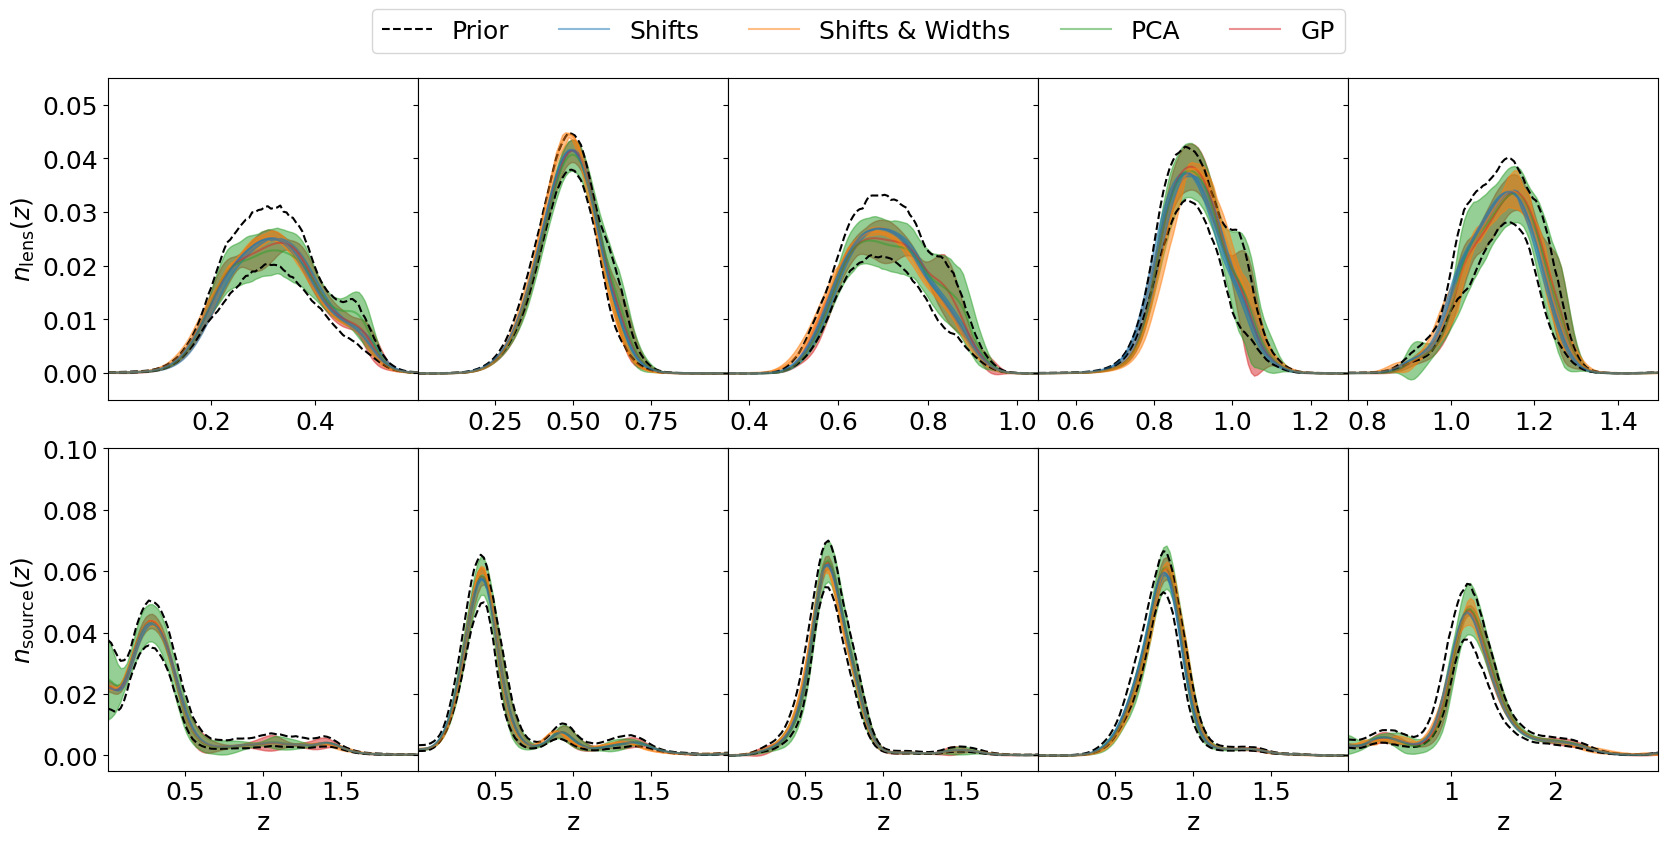

In [ ]:
figure, axis = plt.subplots(2, 5, figsize=(5*4,9))
figure.subplots_adjust(wspace=0, hspace=0.15)
lens_tracers = ['lens_0', 'lens_1', 'lens_2', 'lens_3', 'lens_4']
for i, t in enumerate(lens_tracers):
    qs = np.quantile(data_nzs[t], [0.25, 0.5, 0.75], axis=1)
    lq = qs[1]-qs[0]
    uq = qs[2]-qs[1]
    line0=axis[0, i].plot(nzs[t]["z"], 
                np.mean(shifts_nzs[t], axis=0)-lq, 
                ls="--", color="k")
    axis[0, i].plot(nzs[t]["z"], 
                np.mean(shifts_nzs[t], axis=0)+uq, 
                ls="--", color="k")

    qs = np.quantile(gp_nzs[t], [0.25, 0.5, 0.75], axis=0)
    lq = qs[1]-qs[0]
    uq = qs[2]-qs[1]
    line4=axis[0, i].plot(nzs[t]["z"],
                np.mean(gp_nzs[t], axis=0), 
                alpha=0.5, color="C3",
                label="GP")
    axis[0, i].fill_between(nzs[t]["z"], 
                    np.mean(gp_nzs[t], axis=0)-lq,
                    np.mean(gp_nzs[t], axis=0)+uq,
                    alpha=0.5, color="C3")
    
    qs = np.quantile(pca_nzs[t], [0.25, 0.5, 0.75], axis=0)
    lq = qs[1]-qs[0]
    uq = qs[2]-qs[1]
    line3=axis[0, i].plot(nzs[t]["z"],
                np.mean(pca_nzs[t], axis=0), 
                alpha=0.5, color="C2",
                label="PCA")
    axis[0, i].fill_between(nzs[t]["z"], 
                    np.mean(pca_nzs[t], axis=0)-lq, 
                    np.mean(pca_nzs[t], axis=0)+uq, 
                    alpha=0.5, color="C2")
    
    qs = np.quantile(SnWs_nzs[t], [0.25, 0.5, 0.75], axis=0)
    lq = qs[1]-qs[0]
    uq = qs[2]-qs[1]
    line2=axis[0, i].plot(nzs[t]["z"],
                np.mean(SnWs_nzs[t], axis=0),
                alpha=0.5, color="C1",
                label="Sifts & Widths")
    axis[0, i].fill_between(nzs[t]["z"], 
                    np.mean(SnWs_nzs[t], axis=0)-lq, 
                    np.mean(SnWs_nzs[t], axis=0)+uq, 
                    alpha=0.5, color="C1")
    
    qs = np.quantile(shifts_nzs[t], [0.25, 0.5, 0.75], axis=0)
    lq = qs[1]-qs[0]
    uq = qs[2]-qs[1]
    line1=axis[0, i].plot(nzs[t]["z"],
            np.mean(shifts_nzs[t], axis=0), 
            alpha=0.5, color="C0",
            label="Shifts")
    axis[0, i].fill_between(nzs[t]["z"], 
                    np.mean(shifts_nzs[t], axis=0)-lq,
                    np.mean(shifts_nzs[t], axis=0)+uq,
                    alpha=0.5, color="C0")
    print("====")
    delta_shifts = np.std(shifts_nzs[t], axis=0)
    delta_snws = np.std(SnWs_nzs[t], axis=0)
    delta_pca = np.std(pca_nzs[t], axis=0)
    delta_gp = np.std(gp_nzs[t], axis=0)
    delta_data = np.std(data_nzs[t], axis=0)
    print(t, 
          "dz: ", np.round(np.mean(delta_shifts), 4),
            "wzdz: ", np.round(np.mean(delta_snws), 4),
            "PCA: ", np.round(np.mean(delta_pca), 4),
            "GP: ", np.round(np.mean(delta_gp), 4),
          "Data: ", np.round(np.mean(delta_data), 4))

    axis[0, i].set_ylim([-0.005, 0.055])
    axis[0, i].set_xlim([nzs[t]["z"][0], nzs[t]["z"][-1]])
    #axis[0, i].set_xticklabels([])
    if i > 0:
        axis[0, i].set_yticklabels([])
    else:
        axis[0, i].set_ylabel(r"$n_{\rm lens}(z)$")
source_tracers = ['source_0', 'source_1', 'source_2', 'source_3', 'source_4']
for i, t in enumerate(source_tracers):
    qs = np.quantile(data_nzs[t], [0.25, 0.5, 0.75], axis=1)
    lq = qs[1]-qs[0]
    uq = qs[2]-qs[1]
    axis[1, i].plot(nzs[t]["z"], 
                np.mean(shifts_nzs[t], axis=0)-lq, 
                ls="--", color="k")
    axis[1, i].plot(nzs[t]["z"], 
                np.mean(shifts_nzs[t], axis=0)+uq, 
                ls="--", color="k")
    
    qs = np.quantile(gp_nzs[t], [0.25, 0.5, 0.75], axis=0)
    lq = qs[1]-qs[0]
    uq = qs[2]-qs[1]
    axis[1, i].plot(nzs[t]["z"],
                np.mean(gp_nzs[t], axis=0), 
                alpha=0.5, color="C3",
                label="GP")
    axis[1, i].fill_between(nzs[t]["z"], 
                    np.mean(gp_nzs[t], axis=0)-lq, 
                    np.mean(gp_nzs[t], axis=0)+uq, 
                    alpha=0.5, color="C3")
    
    qs = np.quantile(pca_nzs[t], [0.25, 0.5, 0.75], axis=0)
    lq = qs[1]-qs[0]
    uq = qs[2]-qs[1]
    axis[1, i].plot(nzs[t]["z"],
                np.mean(pca_nzs[t], axis=0), 
                alpha=0.5, color="C2",
                label="PCA")
    axis[1, i].fill_between(nzs[t]["z"], 
                    np.mean(pca_nzs[t], axis=0)-lq, 
                    np.mean(pca_nzs[t], axis=0)+uq, 
                    alpha=0.5, color="C2")
    
    qs = np.quantile(SnWs_nzs[t], [0.25, 0.5, 0.75], axis=0)
    lq = qs[1]-qs[0]
    qu = qs[2]-qs[1]
    axis[1, i].plot(nzs[t]["z"],
                np.mean(SnWs_nzs[t], axis=0),
                alpha=0.5, color="C1",
                label="Sifts & Widths")
    axis[1, i].fill_between(nzs[t]["z"], 
                    np.mean(SnWs_nzs[t], axis=0)-lq,
                    np.mean(SnWs_nzs[t], axis=0)+qu, 
                    alpha=0.5, color="C1")
    
    qs = np.quantile(shifts_nzs[t], [0.25, 0.5, 0.75], axis=0)
    lq = qs[1]-qs[0]
    uq = qs[2]-qs[1]
    axis[1, i].plot(nzs[t]["z"],
            np.mean(shifts_nzs[t], axis=0), 
            alpha=0.5, color="C0",
            label="Shifts")
    axis[1, i].fill_between(nzs[t]["z"], 
                    np.mean(shifts_nzs[t], axis=0)-lq,
                    np.mean(shifts_nzs[t], axis=0)+uq,
                    alpha=0.5, color="C0")
    
    print("====")
    delta_shifts = np.std(shifts_nzs[t], axis=0)
    delta_snws = np.std(SnWs_nzs[t], axis=0)
    delta_pca = np.std(pca_nzs[t], axis=0)
    delta_gp = np.std(gp_nzs[t], axis=0)
    delta_data = np.std(data_nzs[t], axis=0)
    print(t, 
          "dz: ", np.round(np.mean(delta_shifts), 4),
            "wzdz: ", np.round(np.mean(delta_snws), 4),
            "PCA: ", np.round(np.mean(delta_pca), 4),
            "GP: ", np.round(np.mean(delta_gp), 4),
          "Data: ", np.round(np.mean(delta_data), 4))
    
    axis[1, i].set_ylim([-0.005, 0.1])
    axis[1, i].set_xlim([nzs[t]["z"][0], nzs[t]["z"][-1]])
    if i > 0:
        axis[1, i].set_yticklabels([])
    else:
        axis[1, i].set_ylabel(r"$n_{\rm source}(z)$")
    axis[1, i].set_xlabel("z")

labels = ["Prior", "Shifts", "Shifts & Widths", "PCA", "GP"]
lines = [line0[0], line1[0], line2[0], line3[0], line4[0]]
figure.legend(lines, labels, ncol=5, loc='upper center', bbox_to_anchor=(0.5, 0.97))
figure.savefig("./paper_plots/nz_comparison.pdf", bbox_inches='tight')

## Likelihood

In [ ]:
cls_3x2_nomarg   = np.transpose(np.transpose(np.array(chain_Y1_3x2_nomarg))[14:622])
xi2_3x2_nomarg  = np.array(chain_Y1_3x2_nomarg['lp'])
data_3x2_nomarg  = np.load("sompz_fake_chains/nomarg/Y1_3x2_nomarg_TAP_0.65_init_ϵ_0.005/data_1.npz")

NameError: name 'chain_Y1_3x2_nomarg' is not defined

In [ ]:
lkl_3x2_nomarg.shape

In [ ]:
lkl_3x2_nomarg_m, lkl_3x2_nomarg_s   = np.mean(lkl_3x2_nomarg, axis=1), np.std(lkl_3x2_nomarg, axis=1)

In [ ]:
lkl_3x2_nomarg_cles  = [pacc.ClTheoryEnsemble(cle_3x2,  np.array(lkl_3x2_nomarg[i]))  for i in range(len(lkl_3x2_nomarg))]

In [ ]:
sel_3x2  = np.random.choice(len(lkl_3x2_nomarg), 50)

In [ ]:
cross_pairs =  [['source_0', 'lens_0'],
 ['source_0', 'lens_1'],
 ['source_0', 'lens_2'],
 ['source_0', 'lens_3'],
 ['source_0', 'lens_4'],
 ['source_1', 'lens_0'],
 ['source_1', 'lens_1'],
 ['source_1', 'lens_2'],
 ['source_1', 'lens_3'],
 ['source_1', 'lens_4'],
 ['source_2', 'lens_0'],
 ['source_2', 'lens_1'],
 ['source_2', 'lens_2'],
 ['source_2', 'lens_3'],
 ['source_2', 'lens_4'],
 ['source_3', 'lens_0'],
 ['source_3', 'lens_1'],
 ['source_3', 'lens_2'],
 ['source_3', 'lens_3'],
 ['source_3', 'lens_4'],
 ['source_4', 'lens_0'],
 ['source_4', 'lens_1'],
 ['source_4', 'lens_2'],
 ['source_4', 'lens_3'],
 ['source_4', 'lens_4']]

In [ ]:
g = pacc.plot_cls([[cle_3x2], lkl_3x2_nomarg_cles[sel_3x2]], cle_3x2.pairs,
                configs=[
                    {"colors":['black'], "show_legend":False},
                    {"alpha":0.8, "Xi2s":-xi2_3x2_nomarg[sel_3x2],
                    "show_legend":False, "show_colobar":True}])
g.savefig("./paper_plots/validation_3x2.pdf", bbox_inches='tight')